**This project is aimed to predict house prices based on data provided by bina.az.**

# Data Cleaning

Since the test and train data is already split, in order to avoid data cleaning for both seperately, I'll concatinate and then split the datasets manually. After the cleaning is complete, I'll call the original train as df, then split it into train and test manually. The original test will be kept to run the actual tests on.

In [433]:
# Importing google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [434]:
# Importing pandas

import pandas as pd

In [435]:
# Define paths for train aand test sets, then load them and create dataframes

train_path = '/content/drive/MyDrive/Bina_az inputs/binaaz_train.csv'
test_path = '/content/drive/MyDrive/Bina_az inputs/binaaz_test.csv'

train_original = pd.read_csv(train_path)
test_original = pd.read_csv(test_path)

In [436]:
# For Data Cleaning, I'll combine both dfs

train_test = pd.concat([train_original, test_original])

In [437]:
# Check number of rows and columns

train_original.shape, test_original.shape, train_test.shape

((69315, 18), (20000, 17), (89315, 18))

In [438]:
# See what we have

train_test.head()

_id                                              title     price  \
0    6    Satılır 3 otaqlı yeni tikili 135 m², Gənclik m.  300000.0   
1   22  Satılır 3 otaqlı yeni tikili 132.5 m², Nəriman...  153000.0   
2   72      Satılır 2 otaqlı yeni tikili 115 m², Bayıl q.  171300.0   
3   76     Satılır 2 otaqlı yeni tikili 43 m², Masazır q.   44500.0   
4   86  Satılır 2 otaqlı yeni tikili 65 m², Memar Əcəm...   89900.0   

  price_currency         poster       poster_type  \
0            AZN        Mubariz  vasitəçi (agent)   
1            AZN  Самир Ахмедов  vasitəçi (agent)   
2            AZN         Fikrət  vasitəçi (agent)   
3            AZN          QASIM  vasitəçi (agent)   
4            AZN     Heydər bəy  vasitəçi (agent)   

                               Ünvan  \
0   Bakı şəhəri, Bakıxanov  küçəsi     
1      Bakı şəhəri, ул.Табриза 21-23   
2      Bakı şəhəri, Q.Abbasov küçəsi   
3      Bakı şəhəri, İstiqlaliyyət 14   
4        Bakı şəhəri, Mir Cəlal küç.   

                                         description       Yeniləndi  Mərtəbə  \
0  Təcili  Satılır...Qaz  Kupça  var..\nRoseville...  05 Fevral 2021   5 / 17   
1  Срочно.В Наримановском р-не недалеко от 162 шк...  05 Fevral 2021  10 / 16   
2  Səbail rayonu ,Bayıl qəsəbəsi Q.Abbasov küçəsi...  05 Fevral 2021   7 / 14   
3  Masazır qəsəbəsi, Yeni Bakı yaşayış kompleksi ...  05 Fevral 2021    4 / 8   
4  Tecili satilir !!\n4 cu mikrorayonda, Elmed kl...  05 Fevral 2021  12 / 18   

       Sahə  Otaq sayı   Kupça İpoteka  \
0    135 m²          3     var  yoxdur   
1  132.5 m²          3  yoxdur  yoxdur   
2    115 m²          2  yoxdur  yoxdur   
3     43 m²          2     var  yoxdur   
4     65 m²          2     var  yoxdur   

                                           locations   latitude  longitude  \
0  \nGənclik m.\nRespublika stadionu \nNərimanov ...  40.400420  49.851554   
1                   \nŞərq bazarı \nNərimanov r.\n\n  40.389663  49.853717   
2                          \nSəbail r.\nBayıl q.\n\n  40.347625  49.836685   
3                       \nAbşeron r.\nMasazır q.\n\n  40.492294  49.747231   
4  \nMemar Əcəmi m.\nNəsimi r.\n4-cü mikrorayon q...  40.417271  49.810311   

  seher  
0  baki  
1  baki  
2  baki  
3  baki  
4  baki

In [439]:
# Check the columns

train_test.columns

Index(['_id', 'title', 'price', 'price_currency', 'poster', 'poster_type',
       'Ünvan', 'description', 'Yeniləndi', 'Mərtəbə', 'Sahə', 'Otaq sayı',
       'Kupça', 'İpoteka', 'locations', 'latitude', 'longitude', 'seher'],
      dtype='object')

The column names need to be nifty. We'll start by changing them.

In [440]:
# Capitalizing first letters of column names

train_test.columns = [col.title() for col in train_test.columns]
train_test.columns

Index(['_Id', 'Title', 'Price', 'Price_Currency', 'Poster', 'Poster_Type',
       'Ünvan', 'Description', 'Yeniləndi', 'Mərtəbə', 'Sahə', 'Otaq Sayı',
       'Kupça', 'İpoteka', 'Locations', 'Latitude', 'Longitude', 'Seher'],
      dtype='object')

In [441]:
# Changing column names manually; we don't need Price and Price Currency as seperate columns, instead, we'll have 1 column - Price (AZN)
# I also decided to have all columns in English

train_test = train_test.rename(columns={'_Id': 'ID', 'Price': 'Price_AZN', 'Ünvan': 'Location', 'Yeniləndi': 'Update_date', 'Mərtəbə': 'Floor', 'Sahə': 'Area_m2', 'Otaq Sayı': 'Room_count', 'Kupça': 'Bill_of_Sale', 'İpoteka': 'Mortgage', 'Seher': 'City'})

In [442]:
# See the updated columns

train_test.columns

Index(['ID', 'Title', 'Price_AZN', 'Price_Currency', 'Poster', 'Poster_Type',
       'Location', 'Description', 'Update_date', 'Floor', 'Area_m2',
       'Room_count', 'Bill_of_Sale', 'Mortgage', 'Locations', 'Latitude',
       'Longitude', 'City'],
      dtype='object')

In [443]:
train_test.head()

ID                                              Title  Price_AZN  \
0   6    Satılır 3 otaqlı yeni tikili 135 m², Gənclik m.   300000.0   
1  22  Satılır 3 otaqlı yeni tikili 132.5 m², Nəriman...   153000.0   
2  72      Satılır 2 otaqlı yeni tikili 115 m², Bayıl q.   171300.0   
3  76     Satılır 2 otaqlı yeni tikili 43 m², Masazır q.    44500.0   
4  86  Satılır 2 otaqlı yeni tikili 65 m², Memar Əcəm...    89900.0   

  Price_Currency         Poster       Poster_Type  \
0            AZN        Mubariz  vasitəçi (agent)   
1            AZN  Самир Ахмедов  vasitəçi (agent)   
2            AZN         Fikrət  vasitəçi (agent)   
3            AZN          QASIM  vasitəçi (agent)   
4            AZN     Heydər bəy  vasitəçi (agent)   

                            Location  \
0   Bakı şəhəri, Bakıxanov  küçəsi     
1      Bakı şəhəri, ул.Табриза 21-23   
2      Bakı şəhəri, Q.Abbasov küçəsi   
3      Bakı şəhəri, İstiqlaliyyət 14   
4        Bakı şəhəri, Mir Cəlal küç.   

                                         Description     Update_date    Floor  \
0  Təcili  Satılır...Qaz  Kupça  var..\nRoseville...  05 Fevral 2021   5 / 17   
1  Срочно.В Наримановском р-не недалеко от 162 шк...  05 Fevral 2021  10 / 16   
2  Səbail rayonu ,Bayıl qəsəbəsi Q.Abbasov küçəsi...  05 Fevral 2021   7 / 14   
3  Masazır qəsəbəsi, Yeni Bakı yaşayış kompleksi ...  05 Fevral 2021    4 / 8   
4  Tecili satilir !!\n4 cu mikrorayonda, Elmed kl...  05 Fevral 2021  12 / 18   

    Area_m2  Room_count Bill_of_Sale Mortgage  \
0    135 m²           3          var   yoxdur   
1  132.5 m²           3       yoxdur   yoxdur   
2    115 m²           2       yoxdur   yoxdur   
3     43 m²           2          var   yoxdur   
4     65 m²           2          var   yoxdur   

                                           Locations   Latitude  Longitude  \
0  \nGənclik m.\nRespublika stadionu \nNərimanov ...  40.400420  49.851554   
1                   \nŞərq bazarı \nNərimanov r.\n\n  40.389663  49.853717   
2                          \nSəbail r.\nBayıl q.\n\n  40.347625  49.836685   
3                       \nAbşeron r.\nMasazır q.\n\n  40.492294  49.747231   
4  \nMemar Əcəmi m.\nNəsimi r.\n4-cü mikrorayon q...  40.417271  49.810311   

   City  
0  baki  
1  baki  
2  baki  
3  baki  
4  baki

In [444]:
# Now we can get rid of extra column - Price_Currency

train_test = train_test.drop('Price_Currency', axis=1)

In [445]:
train_test.head(1)

ID                                            Title  Price_AZN   Poster  \
0   6  Satılır 3 otaqlı yeni tikili 135 m², Gənclik m.   300000.0  Mubariz   

        Poster_Type                           Location  \
0  vasitəçi (agent)   Bakı şəhəri, Bakıxanov  küçəsi     

                                         Description     Update_date   Floor  \
0  Təcili  Satılır...Qaz  Kupça  var..\nRoseville...  05 Fevral 2021  5 / 17   

  Area_m2  Room_count Bill_of_Sale Mortgage  \
0  135 m²           3          var   yoxdur   

                                           Locations  Latitude  Longitude  \
0  \nGənclik m.\nRespublika stadionu \nNərimanov ...  40.40042  49.851554   

   City  
0  baki

From here, I will only deal with the columns that I reckon are needed to build an adequate prediction model. Thus, for the columns I do not perceive as necessary, I will not do any data cleaning. I will only keep the required columns mentioned below:
- Price(AZN)
- Poster_Type
- Floor
- Area_m2
- Room_count
- Bill_of_Sale
- Mortgage
- City
- Latitude
- Longitude


In [446]:
train_test.columns

Index(['ID', 'Title', 'Price_AZN', 'Poster', 'Poster_Type', 'Location',
       'Description', 'Update_date', 'Floor', 'Area_m2', 'Room_count',
       'Bill_of_Sale', 'Mortgage', 'Locations', 'Latitude', 'Longitude',
       'City'],
      dtype='object')

In [447]:
# Store only the columns which are necessary for price prediction into a new df

train_test_df = train_test[['Price_AZN', 'Poster_Type','Floor', 'Area_m2', 'Room_count', 'Bill_of_Sale', 'Mortgage', 'City', 'Latitude', 'Longitude']]

In [448]:
train_test_df.head(1)

Price_AZN       Poster_Type   Floor Area_m2  Room_count Bill_of_Sale  \
0   300000.0  vasitəçi (agent)  5 / 17  135 m²           3          var   

  Mortgage  City  Latitude  Longitude  
0   yoxdur  baki  40.40042  49.851554

I want to seperate the column Floor into two columns: Floor_Level and Max_Floors.

In [449]:
# To see if there's any anomality - I am intending to split the entities within Floor column by '/'

train_test_df.Floor.value_counts()

12 / 16     1691
10 / 16     1667
12 / 17     1616
8 / 16      1609
3 / 16      1512
            ... 
10 / 32        1
14 / 178       1
8 / 28         1
17 / 32        1
2 / 25         1
Name: Floor, Length: 464, dtype: int64

In [450]:
# Splitting Floor level into 2 columns - Floor_Level and Max_Floor_Level

train_test_df[['Floor_Level', 'Max_Floor_Level']] = train_test_df['Floor'].str.split(' / ', expand=True)

<ipython-input-450-7511f2968930>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-450-7511f2968930>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [451]:
train_test_df.head(1)

Price_AZN       Poster_Type   Floor Area_m2  Room_count Bill_of_Sale  \
0   300000.0  vasitəçi (agent)  5 / 17  135 m²           3          var   

  Mortgage  City  Latitude  Longitude Floor_Level Max_Floor_Level  
0   yoxdur  baki  40.40042  49.851554           5              17

In [452]:
# Changing new columns' datatypes to integer

train_test_df['Floor_Level'] = pd.to_numeric(train_test_df['Floor_Level'])
train_test_df['Max_Floor_Level'] = pd.to_numeric(train_test_df['Max_Floor_Level'])

<ipython-input-452-8a959d0f621c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-452-8a959d0f621c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [453]:
# Check the data types of each feature

train_test_df.dtypes

Price_AZN          float64
Poster_Type         object
Floor               object
Area_m2             object
Room_count           int64
Bill_of_Sale        object
Mortgage            object
City                object
Latitude           float64
Longitude          float64
Floor_Level          int64
Max_Floor_Level      int64
dtype: object

In [454]:
# Now we can get rid of Floor column

train_test_df = train_test_df.drop('Floor', axis = 1)

In [455]:
train_test_df.head()

Price_AZN       Poster_Type   Area_m2  Room_count Bill_of_Sale Mortgage  \
0   300000.0  vasitəçi (agent)    135 m²           3          var   yoxdur   
1   153000.0  vasitəçi (agent)  132.5 m²           3       yoxdur   yoxdur   
2   171300.0  vasitəçi (agent)    115 m²           2       yoxdur   yoxdur   
3    44500.0  vasitəçi (agent)     43 m²           2          var   yoxdur   
4    89900.0  vasitəçi (agent)     65 m²           2          var   yoxdur   

   City   Latitude  Longitude  Floor_Level  Max_Floor_Level  
0  baki  40.400420  49.851554            5               17  
1  baki  40.389663  49.853717           10               16  
2  baki  40.347625  49.836685            7               14  
3  baki  40.492294  49.747231            4                8  
4  baki  40.417271  49.810311           12               18

From now on, we'll try to make each column one-by-one clean and prepared for modelling.

### Poster_Type

We should have the entries in English.

In [456]:
# Analye the different values our feature has

train_test_df['Poster_Type'].value_counts()

vasitəçi (agent)    79080
mülkiyyətçi         10235
Name: Poster_Type, dtype: int64

In [457]:
# Change names from Azerbaijani to English

train_test_df['Poster_Type'] = train_test_df['Poster_Type'].replace({'vasitəçi (agent)': 'agent', 'mülkiyyətçi': 'owner'})
train_test_df['Poster_Type'].value_counts()

agent    79080
owner    10235
Name: Poster_Type, dtype: int64

### Area_m2

We should get rid of all non-numerical characters - m2.

In [458]:
# For Area, we might as well drop m2 but I have a nice formula to drop all non numerical characters from both ends, so let's use that instead

import re

remove_non_numerical_from_ends = lambda col: re.sub(r'^\D+|\D+$', '', col) if isinstance(col, str) else col

If we wanted to remove all non-numericals, we would use the following formula:
remove_non_numerical = lambda col: re.sub('[^0-9]', '', col) if isinstance(col, str) else col

In [459]:
# Applying the lambda function to Area column

train_test_df['Area_m2'] = train_test_df['Area_m2'].apply(remove_non_numerical_from_ends)

# Making the column numerical

train_test_df['Area_m2'] = pd.to_numeric(train_test_df['Area_m2'])

In [460]:
train_test_df['Area_m2'].value_counts()

100.0       2167
120.0       2136
90.0        2118
110.0       2035
60.0        1881
            ... 
47.4           1
436.0          1
81.8           1
350000.0       1
128.9          1
Name: Area_m2, Length: 1484, dtype: int64

In [461]:
train_test_df.dtypes

Price_AZN          float64
Poster_Type         object
Area_m2            float64
Room_count           int64
Bill_of_Sale        object
Mortgage            object
City                object
Latitude           float64
Longitude          float64
Floor_Level          int64
Max_Floor_Level      int64
dtype: object

In [462]:
train_test_df.head()

Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale Mortgage  City  \
0   300000.0       agent    135.0           3          var   yoxdur  baki   
1   153000.0       agent    132.5           3       yoxdur   yoxdur  baki   
2   171300.0       agent    115.0           2       yoxdur   yoxdur  baki   
3    44500.0       agent     43.0           2          var   yoxdur  baki   
4    89900.0       agent     65.0           2          var   yoxdur  baki   

    Latitude  Longitude  Floor_Level  Max_Floor_Level  
0  40.400420  49.851554            5               17  
1  40.389663  49.853717           10               16  
2  40.347625  49.836685            7               14  
3  40.492294  49.747231            4                8  
4  40.417271  49.810311           12               18

### Bill_of_Sale

We should have the entries in English.

In [463]:
train_test_df['Bill_of_Sale'].value_counts()

var       64785
yoxdur    24529
Name: Bill_of_Sale, dtype: int64

In [464]:
train_test_df['Bill_of_Sale'] = train_test_df['Bill_of_Sale'].replace({'var': 'yes', 'yoxdur': 'no'})
train_test_df['Bill_of_Sale'].value_counts()

yes    64785
no     24529
Name: Bill_of_Sale, dtype: int64

### Mortgage

We should have the entries in English.

In [465]:
train_test_df['Mortgage'].value_counts()

yoxdur    77067
var       12248
Name: Mortgage, dtype: int64

In [466]:
train_test_df['Mortgage'] = train_test_df['Mortgage'].replace({'var': 'yes', 'yoxdur': 'no'})
train_test_df['Mortgage'].value_counts()

no     77067
yes    12248
Name: Mortgage, dtype: int64

### City

We should have the entries in English.

In [467]:
train_test_df['City'].value_counts()

baki        85249
xirdalan     3567
sumqayit      499
Name: City, dtype: int64

In [468]:
train_test_df['City'] = train_test_df['City'].replace({'baki': 'Baku', 'xirdalan': 'Khirdalan','sumqayit' : 'Sumgait'})
train_test_df['City'].value_counts()

Baku         85249
Khirdalan     3567
Sumgait        499
Name: City, dtype: int64

In [469]:
# Removing whitespaces from both ends in case there are any (only for object types)

for col in train_test_df.columns:
    if train_test_df[col].dtype == 'object':
        train_test_df[col] = train_test_df[col].str.strip()

In [470]:
train_test_df.head()

Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale Mortgage  City  \
0   300000.0       agent    135.0           3          yes       no  Baku   
1   153000.0       agent    132.5           3           no       no  Baku   
2   171300.0       agent    115.0           2           no       no  Baku   
3    44500.0       agent     43.0           2          yes       no  Baku   
4    89900.0       agent     65.0           2          yes       no  Baku   

    Latitude  Longitude  Floor_Level  Max_Floor_Level  
0  40.400420  49.851554            5               17  
1  40.389663  49.853717           10               16  
2  40.347625  49.836685            7               14  
3  40.492294  49.747231            4                8  
4  40.417271  49.810311           12               18

In [471]:
train_test_df.dtypes

Price_AZN          float64
Poster_Type         object
Area_m2            float64
Room_count           int64
Bill_of_Sale        object
Mortgage            object
City                object
Latitude           float64
Longitude          float64
Floor_Level          int64
Max_Floor_Level      int64
dtype: object

In [472]:
train_test_df.shape

(89315, 11)

Every column has the appropriate data type and name now.

# Null Handling

In [473]:
# Check the null values

train_test_df.isnull().sum()

Price_AZN          20000
Poster_Type            0
Area_m2                0
Room_count             0
Bill_of_Sale           1
Mortgage               0
City                   0
Latitude               0
Longitude              0
Floor_Level            0
Max_Floor_Level        0
dtype: int64

In [474]:
# Check if the null is in train_original or test_original (necessary for further splitting)

train_test_df[train_test_df['Bill_of_Sale'].isnull()]

Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale Mortgage  City  \
23369      550.0       agent    110.0           3          NaN       no  Baku   

        Latitude  Longitude  Floor_Level  Max_Floor_Level  
23369  40.382186  49.804416            3               16

Last 20,000 rows are from test_original.

So the null is within the train_original: when splitting, we'll consider one less entry after dropping the null from train_original.

Since 1 null is nothing when compared to the size of our dataset (89315 rows), we might as well just drop them from Bill_of_Sale column.

In [475]:
train_test_df = train_test_df.dropna(subset=['Bill_of_Sale'])

In [476]:
train_test_df.shape

(89314, 11)

# Outlier Detection & Removal

There are different methods to detect outliers, including **IQR, Z-Score and Percentile**. But all of these methods work on **1D** - we can only apply them on one column. Considering the fact that some columns are correlated in a sense that we should take a look at all of them before deciding whether the point is an outlier or not, we may need to create extra features that are combination of two or more columns. For example, Area and Price. We may wanna create a column price per area as they are correlated and better to be analyzed together.


---


Another way around this issue is using **Isolation Forests** - an anomaly detection algorithm which is associated to **Unsupervised Learning** and detects anomalies by isolating each point by selecting random features and building random decision trees. It is especially useful since the more features are passed through the algorithm, the better results it may give.

## An example for Isolation Forests

In [477]:
# Splitting train and test data - we'll only work on train data from now on

train_df = train_test_df.iloc[:69314, :]
test_df = train_test_df.iloc[69314:, :]

In [478]:
# Just to be sure the split is correct - check last rows of train (should not have NaN for Price_AZN)

train_df.tail()

Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale Mortgage  \
69310   550000.0       agent    220.0           4          yes       no   
69311   177000.0       agent     68.0           2           no       no   
69312    46000.0       agent     72.0           2           no       no   
69313   109000.0       agent    109.0           3           no       no   
69314    74000.0       agent     82.0           2           no       no   

            City   Latitude  Longitude  Floor_Level  Max_Floor_Level  
69310       Baku  40.384744  49.841745           17               17  
69311       Baku  40.402843  49.870677           11               17  
69312  Khirdalan  40.463913  49.723795            7                7  
69313  Khirdalan  40.462931  49.725277            4                7  
69314  Khirdalan  40.453903  49.739916           13               16

In [479]:
# The same for test_df - check first rows of test_df (should start with NaN for Price_AZN)

test_df.head()

Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale Mortgage  City  \
0        NaN       agent     50.4           1           no       no  Baku   
1        NaN       owner     98.0           3          yes      yes  Baku   
2        NaN       agent    205.0           5           no       no  Baku   
3        NaN       agent    117.0           3          yes       no  Baku   
4        NaN       agent    227.0           4           no       no  Baku   

    Latitude  Longitude  Floor_Level  Max_Floor_Level  
0  40.422748  49.923277            8               14  
1  40.338863  49.806822            5               16  
2  40.382519  49.811850           13               18  
3  40.390666  49.788563            4               16  
4  40.393495  49.843594            9               18

For just an example, we'll first look at two features - Floor_Level and Max_Floor_Level. It is in order to understand the essence of Isolation Forests. Afterwards, we will deal with all the features together.

In [480]:
from sklearn.ensemble import IsolationForest
import seaborn as sns

In [481]:
# Features to be analyzed

anomaly_inputs = ['Floor_Level', 'Max_Floor_Level']

In [482]:
model_IF = IsolationForest(contamination = 0.1, random_state = 31)

# contamination - the percentage of data that needs to be considered as an outlier. In our case, 10% is going to be considered an outlier.

In [483]:
# Fit the model to selected columns

model_IF.fit(train_df[anomaly_inputs])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.1, random_state=31)

In [484]:
# Creating a new column called anomaly_score. It'll just show the output anomaly scores for each datapoint.

#THE LOWER THE SCORE, THE MORE ABNORMAL THE DATAPOINT!!!

train_df['anomaly_score'] = model_IF.decision_function(train_df[anomaly_inputs])

<ipython-input-484-26d93b073507>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [485]:
# Creating another column called anomaly. It'll give two values: 1 and -1.

# 1 means not anomaly, -1 means anomaly(outlier).

train_df['anomaly'] = model_IF.predict(train_df[anomaly_inputs])

<ipython-input-485-2d536b3785e1>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [486]:
# Check the anomality of selected columns

train_df.loc[:, ['Floor_Level', 'Max_Floor_Level', 'anomaly_score', 'anomaly']]

Floor_Level  Max_Floor_Level  anomaly_score  anomaly
0                5               17       0.130568        1
1               10               16       0.156230        1
2                7               14       0.082828        1
3                4                8       0.018489        1
4               12               18       0.133269        1
...            ...              ...            ...      ...
69310           17               17       0.047777        1
69311           11               17       0.144511        1
69312            7                7      -0.022367       -1
69313            4                7       0.028215        1
69314           13               16       0.126940        1

[69314 rows x 4 columns]

In [487]:
# Creating a function to see how the algorithm classified datapoints as outliers/inliers


def outlier_plot(data, outlier_method_name, x_var, y_var, x_axis_limits = None, y_axis_limits = None):

    # Determine default limits if not provided

    if x_axis_limits is None:
       x_axis_limits = [0.8 * data[x_var].quantile(0.25), 1.2 * data[x_var].quantile(0.75)]
    if y_axis_limits is None:
       y_axis_limits = [0.8 * data[y_var].quantile(0.25), 1.2 * data[y_var].quantile(0.75)]

    # Could've used just IQR without multiplication to 0.8 and 1.2. The reason is to see some interesting points outside IQR if there's any.

    print(data.columns)
    print(f'Outlier Method: {outlier_method_name}')
    method = f'{outlier_method_name}_anomaly'
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of normal values {len(data[data['anomaly']==1])}")
    print(f"Total Number of Values: {len(data)}")
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1, -1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=x_axis_limits, ylim=y_axis_limits, xlabel=x_var, ylabel=y_var)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']==-1])} points")
    axes[1].set_title(f"Inliers\n{len(data[data['anomaly']==1])} points")
    return g


In [488]:
# Analyzing the column - I'm interested in the range of values

train_df['Floor_Level'].describe()

count    69314.000000
mean         9.171019
std          4.777862
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         29.000000
Name: Floor_Level, dtype: float64

In [489]:
# The same for Max_Floor_Level

train_df['Max_Floor_Level'].describe()

count    6.931400e+04
mean     6.028978e+01
std      7.610816e+03
min      1.000000e+00
25%      1.500000e+01
50%      1.700000e+01
75%      1.800000e+01
max      1.957510e+06
Name: Max_Floor_Level, dtype: float64

In [490]:
train_df.head()

Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale Mortgage  City  \
0   300000.0       agent    135.0           3          yes       no  Baku   
1   153000.0       agent    132.5           3           no       no  Baku   
2   171300.0       agent    115.0           2           no       no  Baku   
3    44500.0       agent     43.0           2          yes       no  Baku   
4    89900.0       agent     65.0           2          yes       no  Baku   

    Latitude  Longitude  Floor_Level  Max_Floor_Level  anomaly_score  anomaly  
0  40.400420  49.851554            5               17       0.130568        1  
1  40.389663  49.853717           10               16       0.156230        1  
2  40.347625  49.836685            7               14       0.082828        1  
3  40.492294  49.747231            4                8       0.018489        1  
4  40.417271  49.810311           12               18       0.133269        1

Index(['Price_AZN', 'Poster_Type', 'Area_m2', 'Room_count', 'Bill_of_Sale',
       'Mortgage', 'City', 'Latitude', 'Longitude', 'Floor_Level',
       'Max_Floor_Level', 'anomaly_score', 'anomaly'],
      dtype='object')
Outlier Method: Isolation Forest
Number of anomalous values 6721
Number of normal values 62593
Total Number of Values: 69314


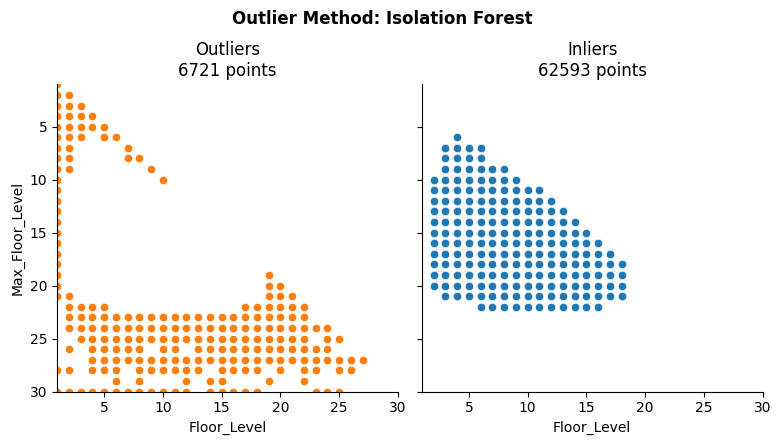

In [491]:
# Plot the dot graphs to see Outliers and Inliers

outlier_plot(train_df, "Isolation Forest","Floor_Level",  "Max_Floor_Level", [1,30], [30, 1])

**NOTE: The Selection of contamination hyperparameter for Isolation Forest depends on the requirements. It can be set by trying out different variables or one can use hyperparameter tuning. Since it is relatively easy to set different values and see the difference with bare eyes, there was no need to use hyperparameter tuning.**

## Feature Creation - **Floor_Ratio**

At this point, I realize that instead of having Floor_Level and Max_Floor_Level, it is actually better to have a column which combines both - Floor_Ratio which equates for Floor_Level/Max_Floor_Level.

In [492]:
train_df.head()

Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale Mortgage  City  \
0   300000.0       agent    135.0           3          yes       no  Baku   
1   153000.0       agent    132.5           3           no       no  Baku   
2   171300.0       agent    115.0           2           no       no  Baku   
3    44500.0       agent     43.0           2          yes       no  Baku   
4    89900.0       agent     65.0           2          yes       no  Baku   

    Latitude  Longitude  Floor_Level  Max_Floor_Level  anomaly_score  anomaly  
0  40.400420  49.851554            5               17       0.130568        1  
1  40.389663  49.853717           10               16       0.156230        1  
2  40.347625  49.836685            7               14       0.082828        1  
3  40.492294  49.747231            4                8       0.018489        1  
4  40.417271  49.810311           12               18       0.133269        1

In [493]:
test_df.head()

Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale Mortgage  City  \
0        NaN       agent     50.4           1           no       no  Baku   
1        NaN       owner     98.0           3          yes      yes  Baku   
2        NaN       agent    205.0           5           no       no  Baku   
3        NaN       agent    117.0           3          yes       no  Baku   
4        NaN       agent    227.0           4           no       no  Baku   

    Latitude  Longitude  Floor_Level  Max_Floor_Level  
0  40.422748  49.923277            8               14  
1  40.338863  49.806822            5               16  
2  40.382519  49.811850           13               18  
3  40.390666  49.788563            4               16  
4  40.393495  49.843594            9               18

In [494]:
# Creating the new column

train_df['Floor_Ratio'] = train_df['Floor_Level']/train_df['Max_Floor_Level']

<ipython-input-494-07b64eda183d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [495]:
train_df.head()

Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale Mortgage  City  \
0   300000.0       agent    135.0           3          yes       no  Baku   
1   153000.0       agent    132.5           3           no       no  Baku   
2   171300.0       agent    115.0           2           no       no  Baku   
3    44500.0       agent     43.0           2          yes       no  Baku   
4    89900.0       agent     65.0           2          yes       no  Baku   

    Latitude  Longitude  Floor_Level  Max_Floor_Level  anomaly_score  anomaly  \
0  40.400420  49.851554            5               17       0.130568        1   
1  40.389663  49.853717           10               16       0.156230        1   
2  40.347625  49.836685            7               14       0.082828        1   
3  40.492294  49.747231            4                8       0.018489        1   
4  40.417271  49.810311           12               18       0.133269        1   

   Floor_Ratio  
0     0.294118  
1     0.625000  
2     0.500000  
3     0.500000  
4     0.666667

In [496]:
# Gotta do the same for test dataset

test_df['Floor_Ratio'] = test_df['Floor_Level']/test_df['Max_Floor_Level']
test_df.head()


<ipython-input-496-e62954831b7f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale Mortgage  City  \
0        NaN       agent     50.4           1           no       no  Baku   
1        NaN       owner     98.0           3          yes      yes  Baku   
2        NaN       agent    205.0           5           no       no  Baku   
3        NaN       agent    117.0           3          yes       no  Baku   
4        NaN       agent    227.0           4           no       no  Baku   

    Latitude  Longitude  Floor_Level  Max_Floor_Level  Floor_Ratio  
0  40.422748  49.923277            8               14     0.571429  
1  40.338863  49.806822            5               16     0.312500  
2  40.382519  49.811850           13               18     0.722222  
3  40.390666  49.788563            4               16     0.250000  
4  40.393495  49.843594            9               18     0.500000

In [497]:
# Getting rid of Floor_Level and Max_Floor_Level for both train and test datasets

train_df.drop(['Floor_Level', 'Max_Floor_Level'], axis = 1, inplace = True)
test_df.drop(['Floor_Level', 'Max_Floor_Level'], axis = 1, inplace = True)

<ipython-input-497-75e869d48f84>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-497-75e869d48f84>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [498]:
train_df.head(1)

Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale Mortgage  City  \
0   300000.0       agent    135.0           3          yes       no  Baku   

   Latitude  Longitude  anomaly_score  anomaly  Floor_Ratio  
0  40.40042  49.851554       0.130568        1     0.294118

In [499]:
test_df.head(1)

Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale Mortgage  City  \
0        NaN       agent     50.4           1           no       no  Baku   

    Latitude  Longitude  Floor_Ratio  
0  40.422748  49.923277     0.571429

## Multiple column outlier detection

Now let's consider all the features we want to analyze.

In [500]:
train_df.columns

Index(['Price_AZN', 'Poster_Type', 'Area_m2', 'Room_count', 'Bill_of_Sale',
       'Mortgage', 'City', 'Latitude', 'Longitude', 'anomaly_score', 'anomaly',
       'Floor_Ratio'],
      dtype='object')

In [501]:
# dropping example columns we created to show what Isolation Tree does

train_df = train_df.drop(columns = {'anomaly_score', 'anomaly'}, axis = 1)

In [502]:
anomaly_features = ['Price_AZN', 'Area_m2', 'Room_count', 'Floor_Ratio']

In [503]:
# Doing exactly the same operations as we did for Floor_Level and Max_Floor_Level previously

model_iso = IsolationForest(contamination = 0.1, random_state = 69)
model_iso.fit(train_df[anomaly_features])
train_df['anomaly_scores'] = model_iso.decision_function(train_df[anomaly_features])
train_df['anomaly'] = model_iso.predict(train_df[anomaly_features])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [504]:
train_df['Area_m2'].describe()

count     69314.00000
mean        189.70214
std        4721.01026
min           0.10000
25%          75.00000
50%         105.00000
75%         139.00000
max      850000.00000
Name: Area_m2, dtype: float64

Index(['Price_AZN', 'Poster_Type', 'Area_m2', 'Room_count', 'Bill_of_Sale',
       'Mortgage', 'City', 'Latitude', 'Longitude', 'Floor_Ratio',
       'anomaly_scores', 'anomaly'],
      dtype='object')
Outlier Method: Isolation Forest
Number of anomalous values 6930
Number of normal values 62384
Total Number of Values: 69314


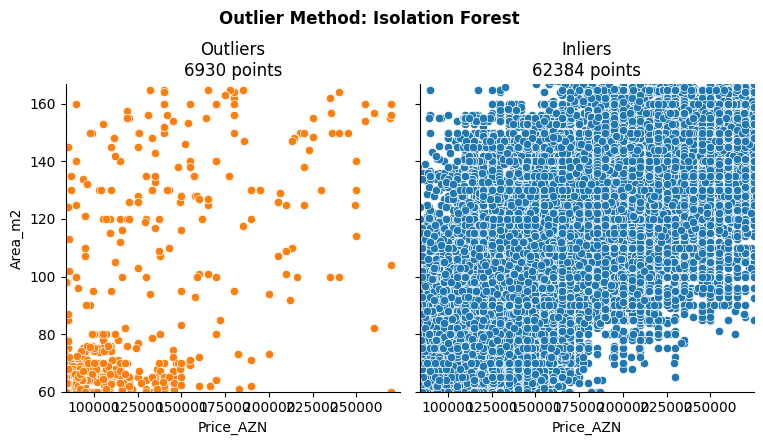

In [505]:
outlier_plot(train_df, 'Isolation Forest', 'Price_AZN', 'Area_m2')

The reason we see the same points for both graphs is because the graphs can only show 2 features. The other features are not considered in visualization here. In order to have a look at all of them, we'll use **pairplot**.

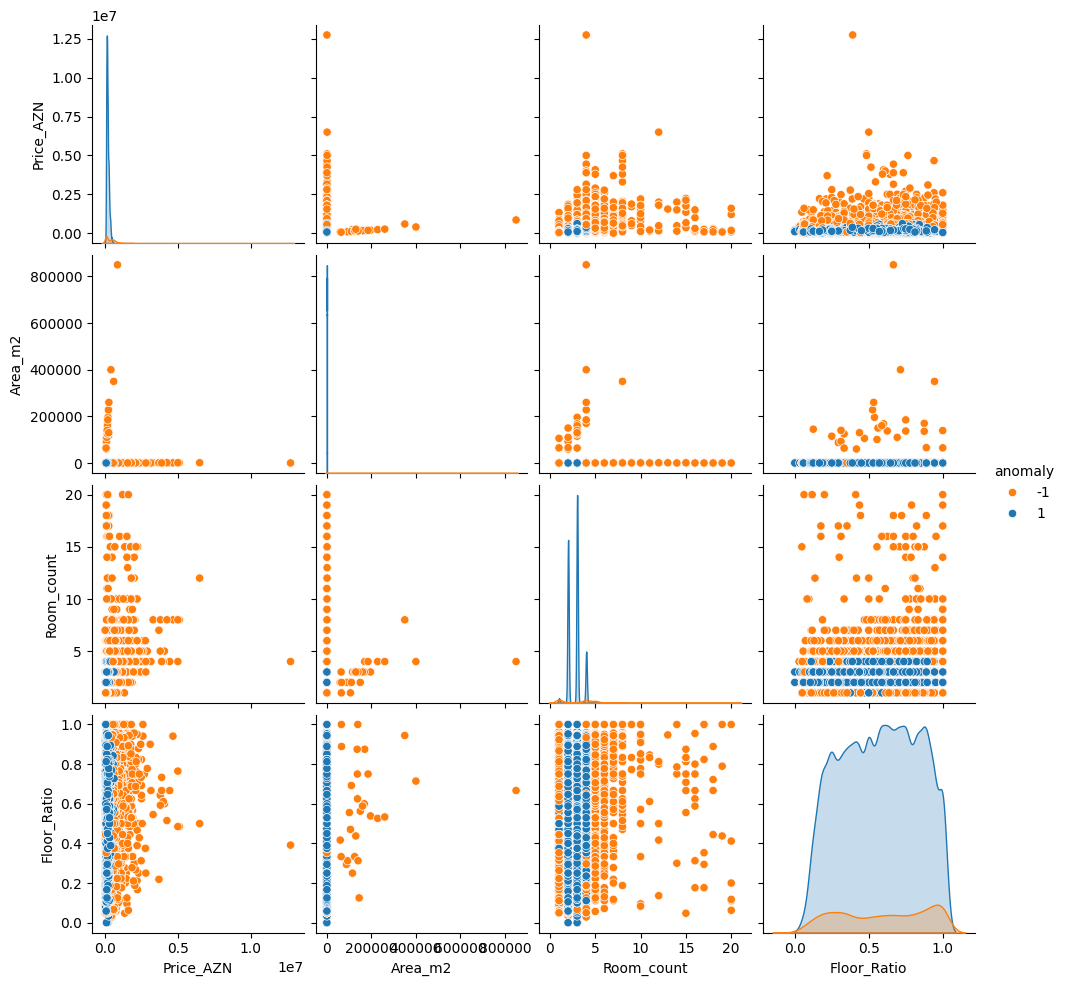

In [506]:
# Pairplot to see outliers by means of each pair of features

from matplotlib import pyplot as plt

palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(train_df, vars = anomaly_features, hue = 'anomaly', palette = palette)
plt.savefig('graph.png', bbox_inches = 'tight')

# NOTE: sns.pairplot can choose the x and y axis limits itself via analyzing the features, no need to manually providing ranges.

**Now let's analyze every column individually.**

#### - Price_AZN

In [507]:
# Let's have inlier and outliers in seperate dataframes

inlier_df = train_df[train_df['anomaly'] == 1]
outlier_df = train_df[train_df['anomaly'] == -1]

In [508]:
# Reset indices to have new ones (not to lose the count as well)

inlier_df = inlier_df.reset_index()

In [509]:
inlier_df.tail()

index  Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale  \
62379  69309   203000.0       agent    131.0           3          yes   
62380  69311   177000.0       agent     68.0           2           no   
62381  69312    46000.0       agent     72.0           2           no   
62382  69313   109000.0       agent    109.0           3           no   
62383  69314    74000.0       agent     82.0           2           no   

      Mortgage       City   Latitude  Longitude  Floor_Ratio  anomaly_scores  \
62379       no       Baku  40.379865  49.848533     0.666667        0.142773   
62380       no       Baku  40.402843  49.870677     0.647059        0.091413   
62381       no  Khirdalan  40.463913  49.723795     1.000000        0.046849   
62382       no  Khirdalan  40.462931  49.725277     0.571429        0.122043   
62383       no  Khirdalan  40.453903  49.739916     0.812500        0.119713   

       anomaly  
62379        1  
62380        1  
62381        1  
62382        1  
62383        1

In [510]:
inlier_df['Price_AZN'].describe()

count     62384.000000
mean     167357.124038
std       84457.623012
min          10.000000
25%      106000.000000
50%      147000.000000
75%      212962.250000
max      640000.000000
Name: Price_AZN, dtype: float64

**NOTE:**

We'll use **boxplots** to individually analyze each feature.

Boxplots show how the values in the data are spread out (Kinda like a probability distribution).

Plot starts with an horizontal line, contains a box and then ends again with a horizontal line.


---


- The box indicates the range between the first quartile **Q1** (25th percentile) and the third quartile **Q3** (75th percentile) - generally, values between Q1 and Q3 are considered to be the most essential.

- The horizontal line in the middle of the box indicates the second quartile **Q2** (50th percentile) and it is the median (middle value) of the dataset.

- Horizontal line below the box is the **"minimum"**, not the minimum value of the dataset. It's calculated as: **Q1 - 1.5*IQR.** Anything below this "minimum" is considered as an outlier.

- Horizontal line above the box is the **"maximum"**, not the maximum value of the dataset. It's calculated as: **Q3 + 1.5*IQR.** Anything above this "maxmimum" is considered as an outlier.



---


However, one needs to be careful and analyze those "outliers" detected automatically with this method as they might not really be outliers.

Refer to https://www.kdnuggets.com/2019/11/understanding-boxplots.html to have a better understanding of boxplots.

<Axes: ylabel='Price_AZN'>

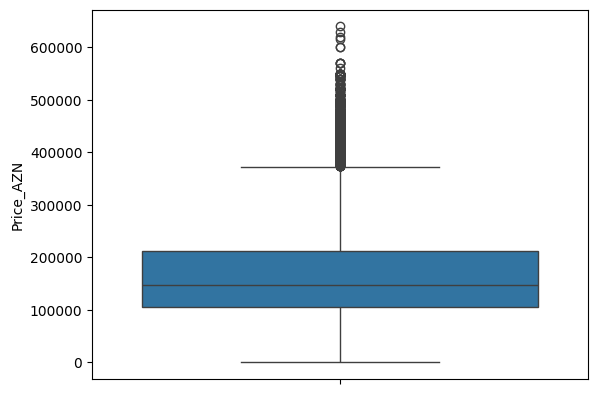

In [511]:
# Plotting the boxplot for our feature

sns.boxplot(inlier_df['Price_AZN'])

In [512]:
# Analyze the points considered as outliers

inlier_df[inlier_df['Price_AZN']>600000]

index  Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale  \
11963  13338   630000.0       agent    140.0           3          yes   
48346  53905   620000.0       agent    114.0           3          yes   
54853  61054   640000.0       agent    155.0           3          yes   
62352  69281   615000.0       agent    114.0           3          yes   

      Mortgage  City   Latitude  Longitude  Floor_Ratio  anomaly_scores  \
11963       no  Baku  40.374467  49.859594     0.454545        0.003562   
48346       no  Baku  40.375550  49.860034     0.400000        0.008549   
54853       no  Baku  40.370668  49.834041     0.666667        0.001839   
62352       no  Baku  40.384360  49.873810     0.727273        0.008681   

       anomaly  
11963        1  
48346        1  
54853        1  
62352        1

I tried to see several ranges and they seemed okay. In case of such extreme values - >600, there seems to be logic. So they're not really outliers.

#### - Area_m2

In [513]:
inlier_df['Area_m2'].describe()

count    62384.000000
mean       107.469037
std         38.691983
min          1.000000
25%         76.000000
50%        103.000000
75%        134.000000
max        255.000000
Name: Area_m2, dtype: float64

<Axes: ylabel='Area_m2'>

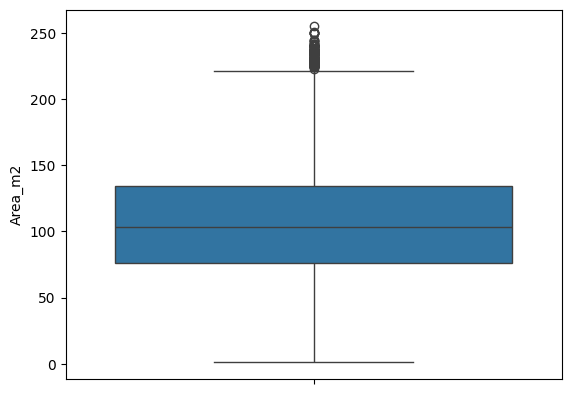

In [514]:
sns.boxplot(inlier_df['Area_m2'])

In [515]:
inlier_df[inlier_df['Area_m2'] > 240]

index  Price_AZN Poster_Type  Area_m2  Room_count Bill_of_Sale  \
3816    4284   310000.0       agent    250.0           4          yes   
8012    8945   305000.0       owner    250.5           4          yes   
8811    9845   330000.0       agent    242.0           4           no   
11263  12568   330000.0       agent    242.0           4           no   
12565  14000   398000.0       agent    242.0           4          yes   
13389  14934   350000.0       agent    244.0           4          yes   
13426  14974   350000.0       agent    245.0           4          yes   
17333  19322   351000.0       owner    242.0           4           no   
18072  20153   275000.0       agent    243.0           4           no   
21825  24336   355000.0       agent    245.0           4          yes   
30887  34481   344000.0       agent    255.0           4          yes   
32851  36683   250000.0       agent    250.0           3           no   
34680  38703   208000.0       agent    244.0           4           no   
35006  39065   310000.0       agent    250.0           4          yes   
59246  65846   335000.0       agent    250.0           4           no   
59984  66668   345000.0       agent    250.0           4           no   

      Mortgage  City   Latitude  Longitude  Floor_Ratio  anomaly_scores  \
3816        no  Baku  40.407812  49.863797     0.727273        0.008030   
8012        no  Baku  40.395718  49.822241     0.727273        0.004856   
8811        no  Baku  40.386384  49.841973     0.555556        0.002949   
11263       no  Baku  40.383173  49.845156     0.500000        0.002795   
12565       no  Baku  40.396652  49.826576     0.736842        0.002225   
13389       no  Baku  40.392515  49.845277     0.625000        0.002560   
13426       no  Baku  40.396199  49.839599     0.625000        0.000769   
17333       no  Baku  40.385435  49.844504     0.555556        0.000713   
18072       no  Baku  40.397470  49.863731     0.352941        0.006591   
21825       no  Baku  40.393968  49.840655     0.705882        0.004867   
30887       no  Baku  40.379289  49.809066     0.750000        0.001334   
32851       no  Baku  40.389900  49.860528     0.650000        0.021323   
34680       no  Baku  40.380170  49.847877     0.500000        0.006284   
35006       no  Baku  40.378363  49.804812     0.647059        0.001055   
59246       no  Baku  40.380602  49.811314     0.714286        0.005020   
59984       no  Baku  40.382539  49.810801     0.666667        0.003334   

       anomaly  
3816         1  
8012         1  
8811         1  
11263        1  
12565        1  
13389        1  
13426        1  
17333        1  
18072        1  
21825        1  
30887        1  
32851        1  
34680        1  
35006        1  
59246        1  
59984        1

They still seem to be reasonable values.

#### - Room_Count

In [516]:
inlier_df['Room_count'].describe()

count    62384.000000
mean         2.717828
std          0.680825
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Room_count, dtype: float64

<Axes: ylabel='Room_count'>

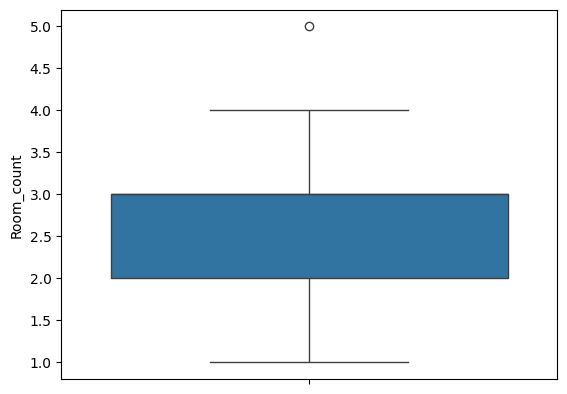

In [517]:
sns.boxplot(inlier_df['Room_count'])

It's actually ideal.

**NOTE**: Normally, there were cases where room count was more than 5, but the algorithm considered them as outliers. Although they were not, for simplicity, we will consider them outliers.

#### - Floor_Ratio

In [518]:
inlier_df['Floor_Ratio'].describe()

count    62384.000000
mean         0.573041
std          0.256255
min          0.000008
25%          0.357143
50%          0.583333
75%          0.789474
max          1.000000
Name: Floor_Ratio, dtype: float64

<Axes: ylabel='Floor_Ratio'>

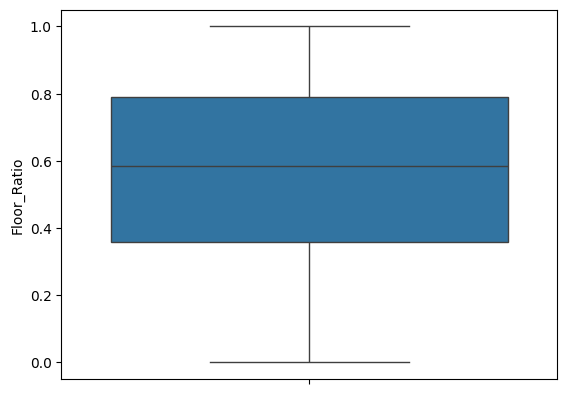

In [519]:
sns.boxplot(inlier_df['Floor_Ratio'])

Nothing wrong here.

In [520]:
from matplotlib import pyplot as plt

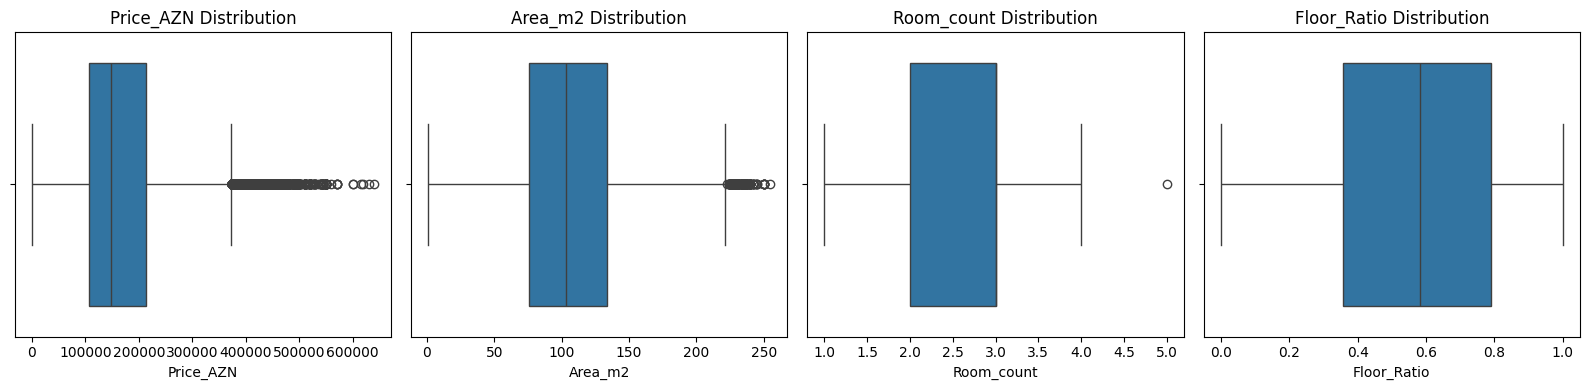

In [521]:
# Plot all boxplots together

cols_to_plot = ['Price_AZN', 'Area_m2', 'Room_count', 'Floor_Ratio']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(16, 4))

# Plot each feature individually
for i, col in enumerate(cols_to_plot):
    sns.boxplot(data=inlier_df, x=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


**Overall, there seems like outliers exist, but when analyzed individually, the data points seem to be accurate, real values.**

In [522]:
inlier_df.columns

Index(['index', 'Price_AZN', 'Poster_Type', 'Area_m2', 'Room_count',
       'Bill_of_Sale', 'Mortgage', 'City', 'Latitude', 'Longitude',
       'Floor_Ratio', 'anomaly_scores', 'anomaly'],
      dtype='object')

In [523]:
inlier_df.shape

(62384, 13)

In [524]:
# Creating the final train df to work with from now on

final_train_df = inlier_df[['Price_AZN', 'Poster_Type', 'Area_m2', 'Room_count', 'Bill_of_Sale',
       'Mortgage', 'City', 'Latitude', 'Longitude', 'Floor_Ratio']]

In [525]:
final_train_df.shape

(62384, 10)

In [526]:
# Just realized Room_count should've been Room_Count :DD

final_train_df = final_train_df.rename(columns = {'Room_count': 'Room_Count'})
test_df = test_df.rename(columns = {'Room_count': 'Room_Count'})

In [527]:
final_train_df.head()

Price_AZN Poster_Type  Area_m2  Room_Count Bill_of_Sale Mortgage  City  \
0   300000.0       agent    135.0           3          yes       no  Baku   
1   153000.0       agent    132.5           3           no       no  Baku   
2   171300.0       agent    115.0           2           no       no  Baku   
3    44500.0       agent     43.0           2          yes       no  Baku   
4    89900.0       agent     65.0           2          yes       no  Baku   

    Latitude  Longitude  Floor_Ratio  
0  40.400420  49.851554     0.294118  
1  40.389663  49.853717     0.625000  
2  40.347625  49.836685     0.500000  
3  40.492294  49.747231     0.500000  
4  40.417271  49.810311     0.666667

# Label / One-Hot Encoding

ML algorithms work better with numbers (numerical values) rather than words (categorical values, objects). We have features like Bill_of_Sale, Mortgage, City which are represented as certain words.

To make sure the ML model works properly, we need to come up with an understandable, logical numbering for those words.

---

*   **Label Encoding**: Mostly used when there's an inherent order within the data (ordinal features). For example: let's consider a column named "Seniority". We might have values like "junior, middle, senior". There's a natural order, junior being the lowest rank and senior being the highest. Therefore, it makes sense to give them numeric values like junior:0, middle:1, senior:2. It's also used for "yes/no" type features (or when there are only two possible values for a feature).

*   **One-Hot Encoding (Dummy variables)**: Converting categorical variables into a new set of binary columns (columns can only have 0 or 1 as a value) - they're called dummies. We use them with only nominal features (without intrinsic order). It can handle multiple variables within a column, but one should be careful, if there are a lot of distinct variables, the number of new columns will be a lot, creating **Dimensionality Curse**.

> * **Dummy Trap**: When creating dummy columns, it is essential to drop one of them. The reason is, there's highlt multicollinearity when all of the dummies are available: the linear dependence is too high, almost perfect. Let's consider a column named "Color". It has 3 values red, blue and green. Say we create dummies and keep all of them. It's obvious that if red and blue have a value of 0, the green will be 1 - It becomes difficult for the algorithm to distinguish the individual effect of each feature on the prediction. Thus, we drop one column, say red. We end up with only blue and green columns. Now, if column blue has a value of 0, are we 100% sure that green column will be 1? NO. Because it can also be red, but since we don't have that information, we can't say. Thus, the value of green is not fully dependent on blue - Problem solved!
---

We'll use **Label Encoding** for columns 'Bill_of_Sale' and 'Mortgage' since they are either yes or no / agent or owner - 2 values, essentially.

We'll use **One-Hot Encoding** for 'City' since it is a nomial feature.

Refer to https://www.linkedin.com/pulse/dummy-variable-trap-how-reduce-redundancies-reday-zarra/ to read more about the Dummy Trap.

### Label Encoding

In [528]:
# Label Encoding for Bill_of_Sale

final_train_df['Bill_of_Sale_Label'], labels = pd.factorize(final_train_df['Bill_of_Sale'])
final_train_df.head()

Price_AZN Poster_Type  Area_m2  Room_Count Bill_of_Sale Mortgage  City  \
0   300000.0       agent    135.0           3          yes       no  Baku   
1   153000.0       agent    132.5           3           no       no  Baku   
2   171300.0       agent    115.0           2           no       no  Baku   
3    44500.0       agent     43.0           2          yes       no  Baku   
4    89900.0       agent     65.0           2          yes       no  Baku   

    Latitude  Longitude  Floor_Ratio  Bill_of_Sale_Label  
0  40.400420  49.851554     0.294118                   0  
1  40.389663  49.853717     0.625000                   1  
2  40.347625  49.836685     0.500000                   1  
3  40.492294  49.747231     0.500000                   0  
4  40.417271  49.810311     0.666667                   0

In [529]:
# Since it automatically labelled yes:0 and no:1, I should manually change it

final_train_df['Bill_of_Sale_Label'] = final_train_df['Bill_of_Sale_Label'].replace({0: 1, 1: 0})
final_train_df.head()

Price_AZN Poster_Type  Area_m2  Room_Count Bill_of_Sale Mortgage  City  \
0   300000.0       agent    135.0           3          yes       no  Baku   
1   153000.0       agent    132.5           3           no       no  Baku   
2   171300.0       agent    115.0           2           no       no  Baku   
3    44500.0       agent     43.0           2          yes       no  Baku   
4    89900.0       agent     65.0           2          yes       no  Baku   

    Latitude  Longitude  Floor_Ratio  Bill_of_Sale_Label  
0  40.400420  49.851554     0.294118                   1  
1  40.389663  49.853717     0.625000                   0  
2  40.347625  49.836685     0.500000                   0  
3  40.492294  49.747231     0.500000                   1  
4  40.417271  49.810311     0.666667                   1

We could've used sklearn.preprocessing LabelEncoder too.

In [530]:
final_train_df['Mortgage_Label'], labels = pd.factorize(final_train_df['Mortgage'])
final_train_df.head()

Price_AZN Poster_Type  Area_m2  Room_Count Bill_of_Sale Mortgage  City  \
0   300000.0       agent    135.0           3          yes       no  Baku   
1   153000.0       agent    132.5           3           no       no  Baku   
2   171300.0       agent    115.0           2           no       no  Baku   
3    44500.0       agent     43.0           2          yes       no  Baku   
4    89900.0       agent     65.0           2          yes       no  Baku   

    Latitude  Longitude  Floor_Ratio  Bill_of_Sale_Label  Mortgage_Label  
0  40.400420  49.851554     0.294118                   1               0  
1  40.389663  49.853717     0.625000                   0               0  
2  40.347625  49.836685     0.500000                   0               0  
3  40.492294  49.747231     0.500000                   1               0  
4  40.417271  49.810311     0.666667                   1               0

In [531]:
final_train_df['Poster_Type_Label'], labels = pd.factorize(final_train_df['Poster_Type'])
final_train_df.head()

# agent:0
# owner:1

Price_AZN Poster_Type  Area_m2  Room_Count Bill_of_Sale Mortgage  City  \
0   300000.0       agent    135.0           3          yes       no  Baku   
1   153000.0       agent    132.5           3           no       no  Baku   
2   171300.0       agent    115.0           2           no       no  Baku   
3    44500.0       agent     43.0           2          yes       no  Baku   
4    89900.0       agent     65.0           2          yes       no  Baku   

    Latitude  Longitude  Floor_Ratio  Bill_of_Sale_Label  Mortgage_Label  \
0  40.400420  49.851554     0.294118                   1               0   
1  40.389663  49.853717     0.625000                   0               0   
2  40.347625  49.836685     0.500000                   0               0   
3  40.492294  49.747231     0.500000                   1               0   
4  40.417271  49.810311     0.666667                   1               0   

   Poster_Type_Label  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

### One-Hot Encoding (Dummies)

In [532]:
# Creating dummies of City column

city_dummies = pd.get_dummies(final_train_df['City'], prefix = 'City', dtype = int)
city_dummies

City_Baku  City_Khirdalan  City_Sumgait
0              1               0             0
1              1               0             0
2              1               0             0
3              1               0             0
4              1               0             0
...          ...             ...           ...
62379          1               0             0
62380          1               0             0
62381          0               1             0
62382          0               1             0
62383          0               1             0

[62384 rows x 3 columns]

In [533]:
# Dropping one of them to avoid the "Dummy Trap"

city_dummies = city_dummies.drop('City_Baku', axis=1)
city_dummies.head()

City_Khirdalan  City_Sumgait
0               0             0
1               0             0
2               0             0
3               0             0
4               0             0

We could've used scikitlearn.preprocessing OneHotEncoder, it has drop = 'first' feature to avoid dummy trap too.

In [534]:
# Concatenating dummies with our df

final_train_df = pd.concat([final_train_df, city_dummies], axis = 1)
final_train_df.head()

Price_AZN Poster_Type  Area_m2  Room_Count Bill_of_Sale Mortgage  City  \
0   300000.0       agent    135.0           3          yes       no  Baku   
1   153000.0       agent    132.5           3           no       no  Baku   
2   171300.0       agent    115.0           2           no       no  Baku   
3    44500.0       agent     43.0           2          yes       no  Baku   
4    89900.0       agent     65.0           2          yes       no  Baku   

    Latitude  Longitude  Floor_Ratio  Bill_of_Sale_Label  Mortgage_Label  \
0  40.400420  49.851554     0.294118                   1               0   
1  40.389663  49.853717     0.625000                   0               0   
2  40.347625  49.836685     0.500000                   0               0   
3  40.492294  49.747231     0.500000                   1               0   
4  40.417271  49.810311     0.666667                   1               0   

   Poster_Type_Label  City_Khirdalan  City_Sumgait  
0                  0               0             0  
1                  0               0             0  
2                  0               0             0  
3                  0               0             0  
4                  0               0             0

In [535]:
# Now we might as well just drop the original columns that were encoded

final_train_df = final_train_df.drop(['Poster_Type', 'Bill_of_Sale', 'Mortgage', 'City'], axis = 1)
final_train_df.head()

Price_AZN  Area_m2  Room_Count   Latitude  Longitude  Floor_Ratio  \
0   300000.0    135.0           3  40.400420  49.851554     0.294118   
1   153000.0    132.5           3  40.389663  49.853717     0.625000   
2   171300.0    115.0           2  40.347625  49.836685     0.500000   
3    44500.0     43.0           2  40.492294  49.747231     0.500000   
4    89900.0     65.0           2  40.417271  49.810311     0.666667   

   Bill_of_Sale_Label  Mortgage_Label  Poster_Type_Label  City_Khirdalan  \
0                   1               0                  0               0   
1                   0               0                  0               0   
2                   0               0                  0               0   
3                   1               0                  0               0   
4                   1               0                  0               0   

   City_Sumgait  
0             0  
1             0  
2             0  
3             0  
4             0

# Scaling

Since the ranges can change (for example: Area_m2), we need to do some scaling. ML algorithms do not like a feature ranging in very big ranges, the more compact it is, the better.

The reason is one feature might have a bigger impact than the others if we used length-based algorithms (SVM, K-Means Clustering, K-Nearest Neighbors) or gradient-based optimization (Linear Regression). Features with higher ranges will be more dominant in distance calculation, eventually being more important feature than the others, which is not always true.

For example, a 100 m2 difference might have enormous effect on prediction and it might not reflect the real life trend.

For better **feature importance** and **fair comparison**, we scale our data.

---

There are several scaling methods, one can use when it's appropriate:

* StandartScaler - after that, scaled data has mean = 0 and variance = 1 - data becomes **LIKE** a standard distribution.
      formula: z = (x - u) / s
      z: standardized value,
      x: sample, u: mean,
      s: standard deviation

    
* Normalizer - scales our data in a way that it's Euclidean norm is 1, in other words, has a length of 1 in Euclidean space.
> It means that he sample is transformed to lie on the surface of a unit circle centered at the origin (0, 0).

 > To do that, we take sqrt(x^2+y^2+...+n^2) for every row.
Then we divide every element by that result.
At the end, when we do sqrt(x^2+y^2+...+n^2), the result will be 1.
                
 > Better to use if needed to use quadratic form such as dot product or any other kernel to quantify the similarity of any pair of samples.
                

* MinMaxScaler - scale data between min and max (often 0 and 1).

      formulae:
      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min  (axis=0))
      X_scaled = X_std * (max - min) + min
      max = 1, min = 0
                  
 > Note:max and min values can be adjusted like:

        scaler = MinMaxScaler(feature_range=(0, 10))

 > indicating max value is 10 and min is 0
                  

* MaxAbsScaler - scaling sparse data (has empty or 0 values, NOT NaN). It secures the sparseness of data and scales so that maximum absolute value of each feature is scaled to unit size.

      formula: divide each entry / max(value)


In [536]:
# Importing Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [537]:
final_train_df['Area_m2'].describe()

count    62384.000000
mean       107.469037
std         38.691983
min          1.000000
25%         76.000000
50%        103.000000
75%        134.000000
max        255.000000
Name: Area_m2, dtype: float64

In [538]:
final_train_df['Room_Count'].describe()

count    62384.000000
mean         2.717828
std          0.680825
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Room_Count, dtype: float64

In [539]:
final_train_df['Floor_Ratio'].describe()

count    62384.000000
mean         0.573041
std          0.256255
min          0.000008
25%          0.357143
50%          0.583333
75%          0.789474
max          1.000000
Name: Floor_Ratio, dtype: float64

If we take a look at the value ranges, only **Area_m2** needs to be scaled.

In [540]:
# Indicate the features to be scaled

cols_to_scale = ['Area_m2']

In [541]:
# Fit the scaler to the selected column

scaler.fit(final_train_df[cols_to_scale])

StandardScaler()

In [542]:
# Apply the scaling to the selected column and store the new, scaled values in a new column

final_train_df[['Scaled_Area_m2']] = scaler.transform(final_train_df[cols_to_scale])

In [543]:
final_train_df.head()

Price_AZN  Area_m2  Room_Count   Latitude  Longitude  Floor_Ratio  \
0   300000.0    135.0           3  40.400420  49.851554     0.294118   
1   153000.0    132.5           3  40.389663  49.853717     0.625000   
2   171300.0    115.0           2  40.347625  49.836685     0.500000   
3    44500.0     43.0           2  40.492294  49.747231     0.500000   
4    89900.0     65.0           2  40.417271  49.810311     0.666667   

   Bill_of_Sale_Label  Mortgage_Label  Poster_Type_Label  City_Khirdalan  \
0                   1               0                  0               0   
1                   0               0                  0               0   
2                   0               0                  0               0   
3                   1               0                  0               0   
4                   1               0                  0               0   

   City_Sumgait  Scaled_Area_m2  
0             0        0.711548  
1             0        0.646934  
2             0        0.194640  
3             0       -1.666225  
4             0       -1.097627

In [544]:
# To see the effect of Scaling on Price_AZN

final_train_df['Area_m2'].describe(), print("\n"), final_train_df['Scaled_Area_m2'].describe()

(count    62384.000000
 mean       107.469037
 std         38.691983
 min          1.000000
 25%         76.000000
 50%        103.000000
 75%        134.000000
 max        255.000000
 Name: Area_m2, dtype: float64,
 None,
 count    6.238400e+04
 mean     1.804148e-16
 std      1.000008e+00
 min     -2.751730e+00
 25%     -8.133284e-01
 50%     -1.155038e-01
 75%      6.857022e-01
 max      3.812990e+00
 Name: Scaled_Area_m2, dtype: float64)

Before scaling, the values were in range **[1, 255]**, now, the range is like **[-3, 4]**.

Notice that the **mean = 0** and **standard deviation = 1** after scaling (almost).

It is much more suitable for ML algorithm to perform better predictions.

# Clustering (K-Means)

First, we need to be sure that our latitude and longitude data is 100% correct. We will do outlier detection once more for these 2 columns. The reason I didn't do it earlier is because I didn't think I'd need this data later on.

## Outlier Detection for Latitude and Longitude - MANUALLY

In [545]:
final_train_df['Latitude'].describe()

count    62384.000000
mean        40.399402
std          0.201037
min         39.247907
25%         40.383052
50%         40.393835
75%         40.406783
max         89.464469
Name: Latitude, dtype: float64

In [546]:
final_train_df['Longitude'].describe()

count    62384.000000
mean        49.842357
std          0.783962
min       -144.714092
25%         49.808364
50%         49.837074
75%         49.871896
max         50.331135
Name: Longitude, dtype: float64

**From now on, I will manually set the search criteria and look for anomalities by trying different ranges. The values you see below for search critera are the final versions, before them, I tried many other coordinates.**

In [547]:
final_train_df.shape

(62384, 12)

In [548]:
# Set checking criteria for the Latitude

final_train_df[final_train_df['Latitude']<40]

Price_AZN  Area_m2  Room_Count   Latitude  Longitude  Floor_Ratio  \
3402    320000.0    116.0           3  39.247907  49.513147     0.863636   
7862     59000.0     58.0           2  39.887301  49.295470     0.222222   
61547    35000.0     49.0           2  39.945644  49.399441     1.000000   

       Bill_of_Sale_Label  Mortgage_Label  Poster_Type_Label  City_Khirdalan  \
3402                    1               0                  0               0   
7862                    0               0                  1               0   
61547                   1               0                  1               0   

       City_Sumgait  Scaled_Area_m2  
3402              0        0.220486  
7862              0       -1.278545  
61547             0       -1.511153

All of them are outliers, see below:


1.   https://imgur.com/a/rIWMyIt

2.   https://imgur.com/a/sH6VKK5

3.   https://imgur.com/a/lHfehhy



In [549]:
final_train_df[final_train_df['Latitude']>41]

Price_AZN  Area_m2  Room_Count   Latitude   Longitude  Floor_Ratio  \
6705     80000.0     50.5           2  41.415550   48.427218     0.285714   
10574   220000.0    116.0           3  48.084793   33.487829     0.625000   
17272   270000.0    156.0           3  89.464469 -144.714092     0.454545   

       Bill_of_Sale_Label  Mortgage_Label  Poster_Type_Label  City_Khirdalan  \
6705                    1               0                  1               0   
10574                   0               0                  1               0   
17272                   1               0                  1               0   

       City_Sumgait  Scaled_Area_m2  
6705              0       -1.472385  
10574             0        0.220486  
17272             0        1.254300

All of them are outliers, see below:

4. https://imgur.com/a/EilCR6y

5. https://imgur.com/a/2xO090z

6. https://imgur.com/a/zNFI4ys

In [550]:
final_train_df[final_train_df['Longitude']<49]

Price_AZN  Area_m2  Room_Count   Latitude   Longitude  Floor_Ratio  \
6705     80000.0     50.5           2  41.415550   48.427218     0.285714   
10574   220000.0    116.0           3  48.084793   33.487829     0.625000   
17272   270000.0    156.0           3  89.464469 -144.714092     0.454545   
23939    92000.0     70.0           2  40.304790   48.837083     0.117647   

       Bill_of_Sale_Label  Mortgage_Label  Poster_Type_Label  City_Khirdalan  \
6705                    1               0                  1               0   
10574                   0               0                  1               0   
17272                   1               0                  1               0   
23939                   1               0                  0               0   

       City_Sumgait  Scaled_Area_m2  
6705              0       -1.472385  
10574             0        0.220486  
17272             0        1.254300  
23939             0       -0.968401

7. https://imgur.com/a/sMWPUo8

The other three were already found before.



In [551]:
final_train_df[final_train_df['Longitude']>50.2]

Price_AZN  Area_m2  Room_Count   Latitude  Longitude  Floor_Ratio  \
9862     45000.0     95.0           2  40.477775  50.325203     0.555556   
22053   165000.0    120.0           4  40.487862  50.209030     1.000000   
27939    45000.0     95.0           2  40.484127  50.327943     0.555556   
52033   160000.0     64.0           2  40.419951  50.295843     0.450000   
54596    45000.0     95.0           2  40.474968  50.331135     0.555556   

       Bill_of_Sale_Label  Mortgage_Label  Poster_Type_Label  City_Khirdalan  \
9862                    0               0                  1               0   
22053                   1               0                  1               0   
27939                   0               0                  1               0   
52033                   1               1                  0               0   
54596                   0               0                  1               0   

       City_Sumgait  Scaled_Area_m2  
9862              0       -0.322267  
22053             0        0.323867  
27939             0       -0.322267  
52033             0       -1.123473  
54596             0       -0.322267

9862, 27939 and 54596 are in Pirallahi, an island. However, it's close to Baku, thus, them being listed as in Baku does not seem to be a big issue. **Were not considered as outliers!**

**NOTE: Altough some locations are still in Azerbaijan, they do not match the City or the description, so I counted them as outliers too.**

## Outlier Removal

In [552]:
final_train_df.shape

(62384, 12)

In [553]:
# Apply the above indicated filtering to remove outliers

final_train_df = final_train_df[(final_train_df['Latitude']>40 ) & (final_train_df['Latitude']<41)]
final_train_df.shape

(62378, 12)

In [554]:
final_train_df = final_train_df[final_train_df['Longitude']>49]
final_train_df.shape

(62377, 12)

## Scaling ???

* Normally, we should scale our features because K-Means Clustering is based on Eucledian distance and if the value ranges are very different for 2 features, the affect of one feature might be much stronger than the other and resulting in unwanted clusters.


* However, scaling Latitude and Longitude data is not a very good option as Latitude and Longitude represent angular measurements on a sphere (Earth). Applying standard scaling techniques assumes features are in linear units (e.g., meters), which distorts the inherent nature of these coordinates.

* K-Means seeks to minimize Euclidean distances (straight-line distances). This doesn't align well with how distances on a sphere should be interpreted. Points that might be geographically close could end up in very different clusters due to scaling.


---


**Thus, we shall not scale the Lat/Long data and shall not use K-Means to create the clusters.**

However, I've already done it to experiment (to learn K-Means better, Silhouette and Elbow method and etc.).

It should be noted that scaling before K-Means helped too, I also tried to cluster with raw geographical data, didn't work out well.

In [555]:
scaler.fit(final_train_df[['Latitude', 'Longitude']])
final_train_df[['Scaled_Latitude', 'Scaled_Longitude']] = scaler.transform(final_train_df[['Latitude', 'Longitude']])
final_train_df.head()

Price_AZN  Area_m2  Room_Count   Latitude  Longitude  Floor_Ratio  \
0   300000.0    135.0           3  40.400420  49.851554     0.294118   
1   153000.0    132.5           3  40.389663  49.853717     0.625000   
2   171300.0    115.0           2  40.347625  49.836685     0.500000   
3    44500.0     43.0           2  40.492294  49.747231     0.500000   
4    89900.0     65.0           2  40.417271  49.810311     0.666667   

   Bill_of_Sale_Label  Mortgage_Label  Poster_Type_Label  City_Khirdalan  \
0                   1               0                  0               0   
1                   0               0                  0               0   
2                   0               0                  0               0   
3                   1               0                  0               0   
4                   1               0                  0               0   

   City_Sumgait  Scaled_Area_m2  Scaled_Latitude  Scaled_Longitude  
0             0        0.711548         0.066131          0.097737  
1             0        0.646934        -0.306655          0.134464  
2             0        0.194640        -1.763457         -0.154756  
3             0       -1.666225         3.249963         -1.673813  
4             0       -1.097627         0.650102         -0.602636

## Elbow Method - Find the "knee" of the graph

The K-Means algorithm do not choose the K value (number of clusters), it's up to us to decide this value.

For that, there are two famous methods: Elbow Method and Silhouette Method. We'll apply both of them to see which K value is the best.

* Elbow Method: Calculates SSE (Sum of Squared Errors) for each K value. SSE is calculated by substituting the actual value from predicted value and taking a square of it for each predicted value.

      SSE = Σ (y - ŷ)²  , where:
      y is the actual value and,
      ŷ is the predicted value.

 > In case of K-Means Clustering, for each K value, we calculate the distance between each data point and its associated Cluster. So this case:     
      y is the data point and,
      ŷ is the associated cluster centroid.

 >From the graph, wherever there's a significant change in slope ("Elbow"), it's the most appropriate K value. SSE will be very high at first, then decrease rapidly. Then, the decrease rate will slow down dramatically, that's where the Elbow-formed shape occurs, and that's the optimum K value. The reason we do not choose the point where the SSE is lowest is because the number of clusters is very high. Logically, the more the clusters are, the less the SSE is.

* Silhouette Method:

 > Depending on the **cohesion** (similarity) and **seperation** (difference), Silhouette Score is calculated. It varies in range of [-1, 1]. 1 being a perfect seperation, -1 being overlapping of clusters.

       S(i) = [b(i)-a(i)/max{a(i), b(i)}]
       -> b(i) - mean(distance from one data point to all the other data points of the nearest cluster) - SEPERATION
       -> a(i) - mean(distance from one data point to all other data points within its cluster) - COHESION
       -> max{a(i), b(i)} - the highest between a(i) and b(i). We divide by the max because of normalization.

 > We perform this for each data point within the cluster. The Silhouette score of a cluster is the average of Silhouette scores of all data points within it.
  
 > The Silhouette score of a whole dataset with certain K number will be the average of Silhouette score of each cluster.     

In [556]:
from sklearn.cluster import KMeans

k_range = range(1, 10)
sse = []  # Sum of Squared Errors

for k in k_range:
    km = KMeans(n_clusters = k, n_init = 'auto')
    km.fit(final_train_df[['Scaled_Latitude', 'Scaled_Longitude']])
    sse.append(km.inertia_)  # km.inertia_ calculates SSE

In [557]:
# See the SSE scores

sse

[124754.00000000077,
 83857.62587235594,
 42494.73216772069,
 34074.50015139001,
 27719.29635992345,
 22545.813924050562,
 21796.39991671304,
 12967.497466375375,
 13502.805614076859]

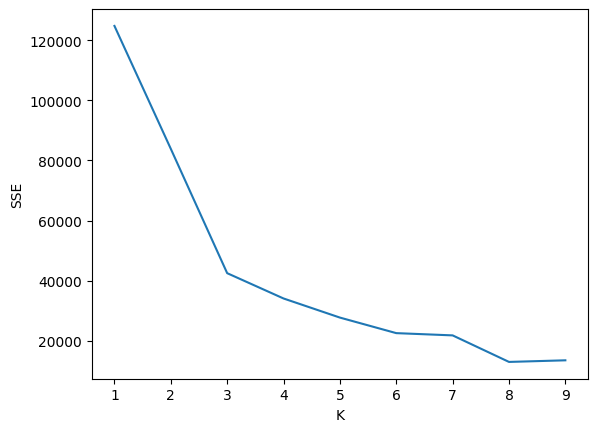

In [558]:
# Plot the K vs SSE graph

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)

From the graph, the optimum K value seems to be **3**.

## Silhouette Method

In [559]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10): # Can't use the range(1, 10) for Silhouette - Silhouette Score requires at least 2 clusters to be calculated
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(final_train_df[['Scaled_Latitude', 'Scaled_Longitude']])
    silhouette_scores.append(silhouette_score(final_train_df[['Scaled_Latitude', 'Scaled_Longitude']], km.labels_))

In [560]:
silhouette_scores

[0.6387941459514994,
 0.5790199783495463,
 0.388704140903827,
 0.4059910979063557,
 0.46966394873553735,
 0.4808902511065022,
 0.5102293256792007,
 0.4989652841011321]

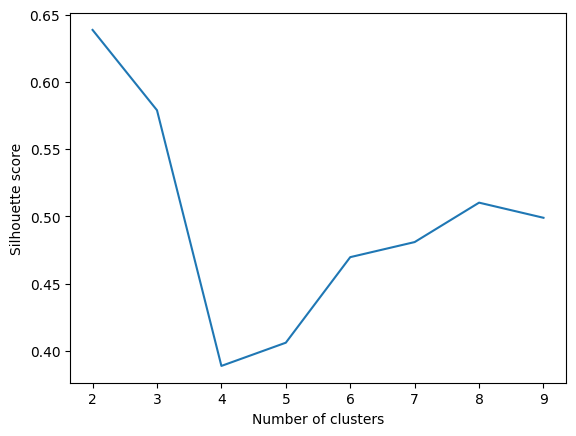

In [561]:
# Plot K vs Silhouette score graph

plt.plot(range(2, 10), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

**NOTE**: Silhouette score varies in range[-1, 1]. 1 means perfect cluster (datapoint is very far away from other clusters and very close to its associated cluster) and -1 means clusters overlapping.

Every time we do Silhouette test, the results may be slightly different. but each time, 3 clusters has one of the best scores. Thus, we'll consider **K=3** to be the best choice.

## K-Means Clustering

**NOTE**: Before scaling, both elbow and silhouette methods gave a result of **K=4**.

After scaling, both gave **K=3** (Silhouette still varying but K=3 always has one of the best scores). I will rely on the results for scaled data as I will do my clustering based on scaled data.

In [562]:
# Make KMeans model from Longitude & Latitude and get 3 clusters

lat_long = final_train_df[['Scaled_Longitude', 'Scaled_Latitude']].to_numpy()
kmeans  = KMeans(n_clusters=3).fit(lat_long)
final_train_df['Clusters_km'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [563]:
final_train_df.head()

Price_AZN  Area_m2  Room_Count   Latitude  Longitude  Floor_Ratio  \
0   300000.0    135.0           3  40.400420  49.851554     0.294118   
1   153000.0    132.5           3  40.389663  49.853717     0.625000   
2   171300.0    115.0           2  40.347625  49.836685     0.500000   
3    44500.0     43.0           2  40.492294  49.747231     0.500000   
4    89900.0     65.0           2  40.417271  49.810311     0.666667   

   Bill_of_Sale_Label  Mortgage_Label  Poster_Type_Label  City_Khirdalan  \
0                   1               0                  0               0   
1                   0               0                  0               0   
2                   0               0                  0               0   
3                   1               0                  0               0   
4                   1               0                  0               0   

   City_Sumgait  Scaled_Area_m2  Scaled_Latitude  Scaled_Longitude  \
0             0        0.711548         0.066131          0.097737   
1             0        0.646934        -0.306655          0.134464   
2             0        0.194640        -1.763457         -0.154756   
3             0       -1.666225         3.249963         -1.673813   
4             0       -1.097627         0.650102         -0.602636   

   Clusters_km  
0            0  
1            0  
2            0  
3            2  
4            0

In [564]:
# See the clusters visually

import plotly.express as px

px.scatter(x = final_train_df['Scaled_Latitude'], y = final_train_df['Scaled_Longitude'], color = kmeans.labels_)

In [565]:
# Getting rid of scaled latitude, longitude and clusters as we just did it as an experiment, it's not the main method

final_train_df = final_train_df.drop(['Scaled_Latitude', 'Scaled_Longitude', 'Clusters_km'], axis=1)
final_train_df.head()


Price_AZN  Area_m2  Room_Count   Latitude  Longitude  Floor_Ratio  \
0   300000.0    135.0           3  40.400420  49.851554     0.294118   
1   153000.0    132.5           3  40.389663  49.853717     0.625000   
2   171300.0    115.0           2  40.347625  49.836685     0.500000   
3    44500.0     43.0           2  40.492294  49.747231     0.500000   
4    89900.0     65.0           2  40.417271  49.810311     0.666667   

   Bill_of_Sale_Label  Mortgage_Label  Poster_Type_Label  City_Khirdalan  \
0                   1               0                  0               0   
1                   0               0                  0               0   
2                   0               0                  0               0   
3                   1               0                  0               0   
4                   1               0                  0               0   

   City_Sumgait  Scaled_Area_m2  
0             0        0.711548  
1             0        0.646934  
2             0        0.194640  
3             0       -1.666225  
4             0       -1.097627

# Clustering (Reference Locations, Haversine Distances and DBSCAN)

**NOTE 1:**

Instead of Clustering based on purely Latitude and Longitude data we have, we'll use another 2 dataframes which have all important locations and their geographical data in Baku.

Since there are 130 (from wikipedia) and 96 (from tripsome) of these kind of places, it is not suitable to just measure the distance between them and our house locations and do clustering as we'll have extra 130+96 features: *distance_from_loc_1, distance_from_loc_2... distance_from_loc_226*.

We'll call the combination of wiki and tripsome locations **landmarks**.

Thus, we need to cluster the important places themselves first. The overall plan is as following:

1. Create clusters from landmarks in Baku
2. Calculate **Haversine distance** between each house and Cluster centroids.
3. Create new features like Distance_from_cluster_1, Distance_from_cluster_2 and etc.
4. Group our locations based on their distances from main locations in Baku.

In STEP 1, we will use **DBSCAN** as it works well and used to cluster geographical data.

In STEP 4, since we have linear distance (km), we may use **K-Means Clustering**.



**NOTE 2:**

Instead of measuring Euclidean distances, we'll use Haversine distances to consider angular measurements.

- Haversine function: hav(θ) = sin²(θ / 2)

- difference in latitudes: (Δφ)

- difference in longitudes: (Δλ)

Finally, **the Haversine formula**:

- distance (in km) =  2 * R * arcsin( √( sin²(Δφ/2) * cos²(λ/2) + cos²(Δφ/2) * sin²(λ/2) * cos²(φ₁) * cos²(φ₂) ) ):

R being the radius of Earth: R = 6,371 km

## Importing Key Locations from wikipedia and tripsome in Baku


In [566]:
wiki_path = "/content/drive/MyDrive/Bina_az inputs/baku_coordinates.xlsx"
wiki_df = pd.read_excel(wiki_path)

In [567]:
wiki_df.head()

Title  Latitude  Longitude
0  Abşeron Milli Parkı  40.28300  50.350000
1      Bakı arxipelaqı  40.28333  49.916670
2             Daş Zirə  40.29073  49.977668
3  Aşurbəyovun villası  40.29320  50.082000
4   Bibiheybət məscidi  40.30861  49.820280

In [568]:
wiki_df.shape

(130, 3)

In [569]:
tripsome_path = '/content/drive/MyDrive/Bina_az inputs/tripsome bina.csv'

tripsome_df = pd.read_csv(tripsome_path)

tripsome_df.head()

Obyektin adı  Longitude   Latitude
0  Heydar Aliyev Cultural Center  45.406712  39.215321
1                 Narimanov Park  49.406990  39.952389
2                  Mud Volcanoes  49.403950  39.999847
3                      Mall BINA  49.335949  40.058929
4              Gobustan Rock Art  49.378159  40.112171

In [570]:
tripsome_df.shape

(96, 3)

## Create clusters for landmarks using DBSCAN

First, let's try on data from wikipedia.

In [571]:
from sklearn.cluster import DBSCAN

data = wiki_df[['Latitude', 'Longitude']].to_numpy()

# DBSCAN to get clusters
dbscan = DBSCAN(eps=0.04, min_samples=3)
labels = dbscan.fit_predict(data)

# eps - maximum radius to define close points
# min_sample - minimum number of close points that a point needs to have in order to be considered as a "Core Point"

# Add cluster labels back to DataFrame
wiki_df['cluster'] = labels

In [572]:
wiki_df.cluster.value_counts()

 0    106
-1     10
 1      5
 2      5
 3      4
Name: cluster, dtype: int64

In [573]:
import plotly.express as px


px.scatter(
    x=wiki_df['Latitude'],
    y=wiki_df['Longitude'],
    color=wiki_df['cluster']
)


No matter which eps and min_samples parameters I try, due to the high density of landmarks, **I can't get good clusters**.


Doing the same for tripsome data

In [574]:
from sklearn.cluster import DBSCAN

data = tripsome_df[['Latitude', 'Longitude']].to_numpy()

dbscan = DBSCAN(eps=0.04, min_samples=3)
labels = dbscan.fit_predict(data)

tripsome_df['cluster'] = labels

In [575]:
tripsome_df.cluster.value_counts()

 0    73
-1    19
 1     4
Name: cluster, dtype: int64

In [576]:
px.scatter(
    x=tripsome_df['Latitude'],
    y=tripsome_df['Longitude'],
    color=tripsome_df['cluster']

)

Again, the clusters are not good for tripsome data too.

Let's try Clustering them altogether.

In [577]:
all_landmarks_df = pd.concat([wiki_df, tripsome_df], axis=0)

In [578]:
from sklearn.cluster import DBSCAN

data = all_landmarks_df[['Latitude', 'Longitude']].to_numpy()

dbscan = DBSCAN(eps=0.04, min_samples=3)
labels = dbscan.fit_predict(data)

all_landmarks_df['cluster'] = labels

In [579]:
all_landmarks_df.cluster.value_counts()

 0    183
-1     19
 1      9
 4      7
 2      5
 3      3
Name: cluster, dtype: int64

In [580]:
px.scatter(
    x=all_landmarks_df['Latitude'],
    y=all_landmarks_df['Longitude'],
    color=all_landmarks_df['cluster']
)

Again, not a great clustering.

**Method Update**:

Although it may seem to be an oversimplification, I am going to choose roughly the area with high density (where most of the landmarks are located) - like a range of latitude and longitudes. We'll call them **high density landmarks**.

Then, I'll take the centroid of high density landmarks to calculate haversine distance from each house to the selected point.



## Determining High Density Landmarks

In [581]:
px.scatter(
    x=all_landmarks_df['Latitude'],
    y=all_landmarks_df['Longitude'],
)

From the map, the determined Lat/Long Boundries are:

**Latitude: 40.355 - 40.38**

**Longitude: 49.82 - 49.87**

In [582]:
all_landmarks_df.shape

(226, 5)

In [583]:
# Extracting landmarks which are concentrated roughly in the same are using above mentioned filtering

high_density_landmarks = all_landmarks_df[(all_landmarks_df['Latitude'] >= 40.355) & (all_landmarks_df['Latitude'] <= 40.38) & (all_landmarks_df['Longitude'] >= 49.82) & (all_landmarks_df['Longitude'] <= 49.87)]

high_density_landmarks.shape


(117, 5)

In [584]:
# Visualization of high density landmarks

px.scatter(
    x=high_density_landmarks['Latitude'],
    y=high_density_landmarks['Longitude'],
)

In [585]:
# Getting the centroid of high density landmarks (mean of latitudes and longitudes)

landmark_centroid_latitude = high_density_landmarks['Latitude'].mean()
landmark_centroid_longitude = high_density_landmarks['Longitude'].mean()

landmark_centroid_latitude, landmark_centroid_longitude

(40.36825244468316, 49.836498438786265)

In [586]:
# Library to measure geometric distance from latitude/longitude values - Haversine distances

from geopy.distance import geodesic

In [587]:
# Define a function which calculates distance in km for each house

def calculate_distance(row):
    house_coords = (row['Latitude'], row['Longitude'])
    distance = geodesic(house_coords, (landmark_centroid_latitude, landmark_centroid_longitude)).kilometers
    return distance

final_train_df['Distance_from_landmarks'] = final_train_df.apply(calculate_distance, axis=1)

In [588]:
final_train_df.head()

Price_AZN  Area_m2  Room_Count   Latitude  Longitude  Floor_Ratio  \
0   300000.0    135.0           3  40.400420  49.851554     0.294118   
1   153000.0    132.5           3  40.389663  49.853717     0.625000   
2   171300.0    115.0           2  40.347625  49.836685     0.500000   
3    44500.0     43.0           2  40.492294  49.747231     0.500000   
4    89900.0     65.0           2  40.417271  49.810311     0.666667   

   Bill_of_Sale_Label  Mortgage_Label  Poster_Type_Label  City_Khirdalan  \
0                   1               0                  0               0   
1                   0               0                  0               0   
2                   0               0                  0               0   
3                   1               0                  0               0   
4                   1               0                  0               0   

   City_Sumgait  Scaled_Area_m2  Distance_from_landmarks  
0             0        0.711548                 3.793833  
1             0        0.646934                 2.791094  
2             0        0.194640                 2.290595  
3             0       -1.666225                15.719358  
4             0       -1.097627                 5.879751

Double checked the distance values, all correct. Visual representation for House 0 can be seen on:

https://imgur.com/a/kUqmauG

Calculation and visualization done on (also see the detailed math behind the calculation here):

https://www.movable-type.co.uk/scripts/latlong.html

## K-Means Clustering based on distance

Now, we'll create clusters based on the distance in kms. Since it a linear measurement rather than an angular one, K-Means can be used.

As usual, the data needs top be scaled first. But as we have only one feature, there can't be relative bias: one feature having more value ranges can't have a bigger effect than the other as there's only one feature.

Thus, **no scaling will be done**.

In [589]:
# Elbow method

k_range = range(1, 10)
sse = []

for k in k_range:
    km = KMeans(n_clusters = k, n_init = 'auto')
    km.fit(final_train_df[['Distance_from_landmarks']])
    sse.append(km.inertia_)  # km.inertia_ calculates SSE

In [590]:
sse

[925333.0894236735,
 239275.7643836405,
 129236.6890404888,
 76147.28350541413,
 44201.180789292404,
 32358.976902427075,
 23842.638739787246,
 17089.409246648174,
 15251.598215817708]

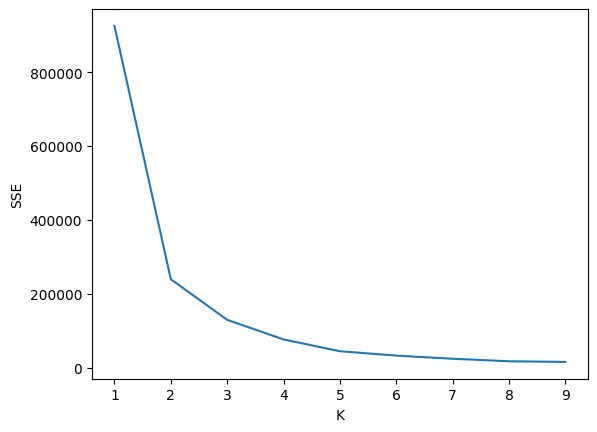

In [591]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)

In [592]:
# Silhouette method

silhouette_scores = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(final_train_df[['Distance_from_landmarks']])
    silhouette_scores.append(silhouette_score(final_train_df[['Distance_from_landmarks']], km.labels_))

In [593]:
silhouette_scores

[0.7739110538914169,
 0.7792507586465757,
 0.611320337510721,
 0.6090121534405736,
 0.5670853312686411,
 0.576688906685193,
 0.6172343590662167,
 0.606359777739331]

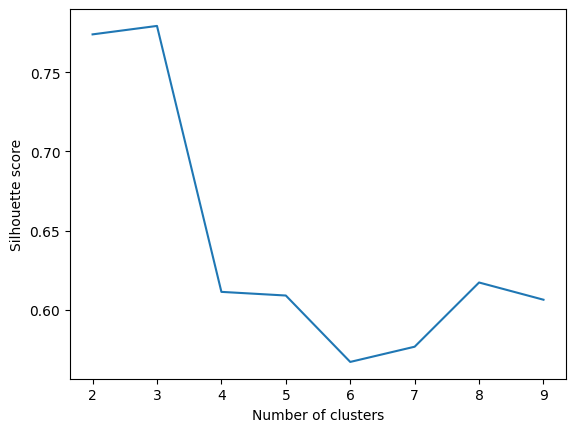

In [594]:
plt.plot(range(2, 10), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Both methods suggest **K=2** is the best, so we'll do it that way.

NOTE: Again, Silhouette outcomes can vary, but it always suggests that K=2 is one of the best options.

In [595]:
# K-Means with 2 clusters

dist = final_train_df[['Distance_from_landmarks']].to_numpy()
kmeans  = KMeans(n_clusters=2).fit(dist)
final_train_df['Clusters_km'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [596]:
final_train_df.head()

Price_AZN  Area_m2  Room_Count   Latitude  Longitude  Floor_Ratio  \
0   300000.0    135.0           3  40.400420  49.851554     0.294118   
1   153000.0    132.5           3  40.389663  49.853717     0.625000   
2   171300.0    115.0           2  40.347625  49.836685     0.500000   
3    44500.0     43.0           2  40.492294  49.747231     0.500000   
4    89900.0     65.0           2  40.417271  49.810311     0.666667   

   Bill_of_Sale_Label  Mortgage_Label  Poster_Type_Label  City_Khirdalan  \
0                   1               0                  0               0   
1                   0               0                  0               0   
2                   0               0                  0               0   
3                   1               0                  0               0   
4                   1               0                  0               0   

   City_Sumgait  Scaled_Area_m2  Distance_from_landmarks  Clusters_km  
0             0        0.711548                 3.793833            0  
1             0        0.646934                 2.791094            0  
2             0        0.194640                 2.290595            0  
3             0       -1.666225                15.719358            1  
4             0       -1.097627                 5.879751            0

In [597]:
# See the clusters visually

import plotly.express as px

px.scatter(x = final_train_df['Latitude'], y = final_train_df['Longitude'], color = kmeans.labels_)

As expected, one cluster for places near the centroid of landmarks, and another which are far away from centroid of landmarks.

It is not the best way to go as we miss the importance of other landmarks, but it was the only way I could think of clustering.

In [598]:
final_train_df.head()

Price_AZN  Area_m2  Room_Count   Latitude  Longitude  Floor_Ratio  \
0   300000.0    135.0           3  40.400420  49.851554     0.294118   
1   153000.0    132.5           3  40.389663  49.853717     0.625000   
2   171300.0    115.0           2  40.347625  49.836685     0.500000   
3    44500.0     43.0           2  40.492294  49.747231     0.500000   
4    89900.0     65.0           2  40.417271  49.810311     0.666667   

   Bill_of_Sale_Label  Mortgage_Label  Poster_Type_Label  City_Khirdalan  \
0                   1               0                  0               0   
1                   0               0                  0               0   
2                   0               0                  0               0   
3                   1               0                  0               0   
4                   1               0                  0               0   

   City_Sumgait  Scaled_Area_m2  Distance_from_landmarks  Clusters_km  
0             0        0.711548                 3.793833            0  
1             0        0.646934                 2.791094            0  
2             0        0.194640                 2.290595            0  
3             0       -1.666225                15.719358            1  
4             0       -1.097627                 5.879751            0

In [599]:
# Getting the final version of train dataframe for model building

final_train_df = final_train_df.drop(['Latitude', 'Longitude', 'Area_m2', 'Distance_from_landmarks'], axis = 1)
final_train_df.head()

Price_AZN  Room_Count  Floor_Ratio  Bill_of_Sale_Label  Mortgage_Label  \
0   300000.0           3     0.294118                   1               0   
1   153000.0           3     0.625000                   0               0   
2   171300.0           2     0.500000                   0               0   
3    44500.0           2     0.500000                   1               0   
4    89900.0           2     0.666667                   1               0   

   Poster_Type_Label  City_Khirdalan  City_Sumgait  Scaled_Area_m2  \
0                  0               0             0        0.711548   
1                  0               0             0        0.646934   
2                  0               0             0        0.194640   
3                  0               0             0       -1.666225   
4                  0               0             0       -1.097627   

   Clusters_km  
0            0  
1            0  
2            0  
3            1  
4            0

# Model Building


Our train dataframe is ready. Now, we'll try to find the best model with best parameters to accurately predict the given house's price.

## Splitting the dataframe into X and y variables

NOTE: Although it is already split and we have train and test sets, I will divide the train set into train and test sets again, try several algorithms and then apply the best algorithm on actual test set.

In [600]:
X = final_train_df.drop('Price_AZN', axis = 1)
y = final_train_df['Price_AZN']

In [601]:
X.head()

Room_Count  Floor_Ratio  Bill_of_Sale_Label  Mortgage_Label  \
0           3     0.294118                   1               0   
1           3     0.625000                   0               0   
2           2     0.500000                   0               0   
3           2     0.500000                   1               0   
4           2     0.666667                   1               0   

   Poster_Type_Label  City_Khirdalan  City_Sumgait  Scaled_Area_m2  \
0                  0               0             0        0.711548   
1                  0               0             0        0.646934   
2                  0               0             0        0.194640   
3                  0               0             0       -1.666225   
4                  0               0             0       -1.097627   

   Clusters_km  
0            0  
1            0  
2            0  
3            1  
4            0

In [602]:
y.head()

0    300000.0
1    153000.0
2    171300.0
3     44500.0
4     89900.0
Name: Price_AZN, dtype: float64

## Finding the best algorithm and its parameters

In [603]:
# Importing all necessary libraries

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

To find algorithms and their parameters, we'll use GridSearchCV which uses cross-validation to give the best results.

* Cross-validation method we'll use is **ShuffleSplit**. It basically shuffles everything in our dataframe and creates random sets of train and test dataframes. n_splits = 5 indicates the algorithm will create 5 different train and test sets and perform tests on each. It then gives the mean score out of these 5 sets.

 > **NOTE**: We don't see the way it creates train and test sets, in fact, we don't see the sets either. It does it in the background and then gives the results.


 * GridSearchCV goes through defined algorithms and their hyperparameters, conducts cross-validation and gives each algorithm's score and its best parameters.

In [604]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR

# Define the function

def find_best_model_using_gridsearchcv(X, y):

    # Dictionary with algorithms and their parameters to check
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}  # Linear regression has no hyperparameters to tune
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.5, 1, 2],  # Reduced range for quicker search
            }
        },
        'ridge': {
            'model': Ridge(solver='auto'),
            'params': {
                'alpha': [0.5, 1, 2]
            }
        },
    }

    scores = []

    # Define cross validation method - We'll use ShuffleSplit (just randomly shuffles the data and creates train, test sets to do the cv)
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1) # 5 different train/test sets, test size is 20% of the overall data size

    # GridSearchCV to get best models/their parameters
    for algo_name, config in algos.items():

        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)

        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

model  best_score   best_params
0  linear_regression    0.679456            {}
1              lasso    0.679460  {'alpha': 2}
2              ridge    0.679457  {'alpha': 2}

In [605]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

## Random Forest Regressor

Because the computation time was too much when Random Forest was introduced to the GridSearchCV, I decided to seperately perform hyperparameter tuning.

In [606]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],  # None for no depth restriction
    'min_samples_split': [2, 5, 10],
}

rs = RandomizedSearchCV(rf, param_grid, n_iter=20, cv=cv, random_state=1) # Randomized Search to decrease computation time

rs.fit(X, y)  # Fit the model

print("Best Parameters:", rs.best_params_)
print("Best Score:", rs.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': None}
Best Score: 0.7747295573871357


Because of the long computation time, I am inserting the best parameters and score as a picture here. It will be gone as an output when I re-run everything. The results are:

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': None}

Best Score: ~0.77

https://imgur.com/a/jyTXAW0

In [607]:
best_parameters = {
    'n_estimators': 100,
    'min_samples_split': 10,
    'max_depth': None
}

best_model = RandomForestRegressor(**best_parameters)
best_model.fit(X, y)

RandomForestRegressor(min_samples_split=10)

## Prepare test data

In [608]:
final_train_df.columns

Index(['Price_AZN', 'Room_Count', 'Floor_Ratio', 'Bill_of_Sale_Label',
       'Mortgage_Label', 'Poster_Type_Label', 'City_Khirdalan', 'City_Sumgait',
       'Scaled_Area_m2', 'Clusters_km'],
      dtype='object')

In [609]:
test_df.columns

Index(['Price_AZN', 'Poster_Type', 'Area_m2', 'Room_Count', 'Bill_of_Sale',
       'Mortgage', 'City', 'Latitude', 'Longitude', 'Floor_Ratio'],
      dtype='object')

In [610]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def preprocess_data(df, scaler):
    # Label Encoding
    label_encoder = LabelEncoder()  # Create an encoder instance
    categorical_cols = ['Bill_of_Sale', 'Mortgage', 'Poster_Type']
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])

    # One-Hot Encoding
    ohe = OneHotEncoder(drop='first', sparse=False)  # Create encoder
    city_ohe = ohe.fit_transform(df[['City']])
    city_ohe_df = pd.DataFrame(city_ohe, columns=ohe.get_feature_names_out(['City']))

    # Join One-Hot Encoded Columns
    df = df.drop('City', axis=1)  # Drop original column
    df = df.join(city_ohe_df)

    # Scaling
    scaler.fit(df[['Area_m2']])
    df['Scaled_Area_m2'] = scaler.transform(df[['Area_m2']])
    return df


In [611]:
test_df.head()

Price_AZN Poster_Type  Area_m2  Room_Count Bill_of_Sale Mortgage  City  \
0        NaN       agent     50.4           1           no       no  Baku   
1        NaN       owner     98.0           3          yes      yes  Baku   
2        NaN       agent    205.0           5           no       no  Baku   
3        NaN       agent    117.0           3          yes       no  Baku   
4        NaN       agent    227.0           4           no       no  Baku   

    Latitude  Longitude  Floor_Ratio  
0  40.422748  49.923277     0.571429  
1  40.338863  49.806822     0.312500  
2  40.382519  49.811850     0.722222  
3  40.390666  49.788563     0.250000  
4  40.393495  49.843594     0.500000

In [612]:
scaler = StandardScaler()

test_df_processed = preprocess_data(test_df, scaler)
test_df_processed.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Price_AZN  Poster_Type  Area_m2  Room_Count  Bill_of_Sale  Mortgage  \
0        NaN            0     50.4           1             0         0   
1        NaN            1     98.0           3             1         1   
2        NaN            0    205.0           5             0         0   
3        NaN            0    117.0           3             1         0   
4        NaN            0    227.0           4             0         0   

    Latitude  Longitude  Floor_Ratio  City_Khirdalan  City_Sumgait  \
0  40.422748  49.923277     0.571429             0.0           0.0   
1  40.338863  49.806822     0.312500             0.0           0.0   
2  40.382519  49.811850     0.722222             0.0           0.0   
3  40.390666  49.788563     0.250000             0.0           0.0   
4  40.393495  49.843594     0.500000             0.0           0.0   

   Scaled_Area_m2  
0       -1.269683  
1       -0.283605  
2        1.932998  
3        0.109997  
4        2.388748

We need to be careful. In train_df, label encoding is **agent:0, owner:1**.

Also, for Bill_of_Sale and Mortgage **no:0 and yes:1**.

I checked with train_df, everything is correct.

In [613]:
def calculate_distance(row):
    house_coords = (row['Latitude'], row['Longitude'])
    distance = geodesic(house_coords, (landmark_centroid_latitude, landmark_centroid_longitude)).kilometers
    return distance

In [614]:
test_df_processed['Distance_from_landmarks'] = test_df_processed.apply(calculate_distance, axis=1)

In [615]:
test_df_processed.head()

Price_AZN  Poster_Type  Area_m2  Room_Count  Bill_of_Sale  Mortgage  \
0        NaN            0     50.4           1             0         0   
1        NaN            1     98.0           3             1         1   
2        NaN            0    205.0           5             0         0   
3        NaN            0    117.0           3             1         0   
4        NaN            0    227.0           4             0         0   

    Latitude  Longitude  Floor_Ratio  City_Khirdalan  City_Sumgait  \
0  40.422748  49.923277     0.571429             0.0           0.0   
1  40.338863  49.806822     0.312500             0.0           0.0   
2  40.382519  49.811850     0.722222             0.0           0.0   
3  40.390666  49.788563     0.250000             0.0           0.0   
4  40.393495  49.843594     0.500000             0.0           0.0   

   Scaled_Area_m2  Distance_from_landmarks  
0       -1.269683                 9.534006  
1       -0.283605                 4.123870  
2        1.932998                 2.625118  
3        0.109997                 4.771241  
4        2.388748                 2.867000

In [616]:
dist = test_df_processed[['Distance_from_landmarks']].to_numpy()
kmeans  = KMeans(n_clusters=2).fit(dist)
test_df_processed['Clusters_km'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [617]:
test_df_processed.head()

Price_AZN  Poster_Type  Area_m2  Room_Count  Bill_of_Sale  Mortgage  \
0        NaN            0     50.4           1             0         0   
1        NaN            1     98.0           3             1         1   
2        NaN            0    205.0           5             0         0   
3        NaN            0    117.0           3             1         0   
4        NaN            0    227.0           4             0         0   

    Latitude  Longitude  Floor_Ratio  City_Khirdalan  City_Sumgait  \
0  40.422748  49.923277     0.571429             0.0           0.0   
1  40.338863  49.806822     0.312500             0.0           0.0   
2  40.382519  49.811850     0.722222             0.0           0.0   
3  40.390666  49.788563     0.250000             0.0           0.0   
4  40.393495  49.843594     0.500000             0.0           0.0   

   Scaled_Area_m2  Distance_from_landmarks  Clusters_km  
0       -1.269683                 9.534006            0  
1       -0.283605                 4.123870            1  
2        1.932998                 2.625118            1  
3        0.109997                 4.771241            1  
4        2.388748                 2.867000            1

In [618]:
import plotly.express as px

px.scatter(x = test_df_processed['Latitude'], y = test_df_processed['Longitude'], color = kmeans.labels_)

In [619]:
test_df_processed = test_df_processed.drop(['Area_m2', 'Latitude','Longitude', 'Distance_from_landmarks'], axis = 1)
test_df_processed.head()

Price_AZN  Poster_Type  Room_Count  Bill_of_Sale  Mortgage  Floor_Ratio  \
0        NaN            0           1             0         0     0.571429   
1        NaN            1           3             1         1     0.312500   
2        NaN            0           5             0         0     0.722222   
3        NaN            0           3             1         0     0.250000   
4        NaN            0           4             0         0     0.500000   

   City_Khirdalan  City_Sumgait  Scaled_Area_m2  Clusters_km  
0             0.0           0.0       -1.269683            0  
1             0.0           0.0       -0.283605            1  
2             0.0           0.0        1.932998            1  
3             0.0           0.0        0.109997            1  
4             0.0           0.0        2.388748            1

In [620]:
final_train_df.head()

Price_AZN  Room_Count  Floor_Ratio  Bill_of_Sale_Label  Mortgage_Label  \
0   300000.0           3     0.294118                   1               0   
1   153000.0           3     0.625000                   0               0   
2   171300.0           2     0.500000                   0               0   
3    44500.0           2     0.500000                   1               0   
4    89900.0           2     0.666667                   1               0   

   Poster_Type_Label  City_Khirdalan  City_Sumgait  Scaled_Area_m2  \
0                  0               0             0        0.711548   
1                  0               0             0        0.646934   
2                  0               0             0        0.194640   
3                  0               0             0       -1.666225   
4                  0               0             0       -1.097627   

   Clusters_km  
0            0  
1            0  
2            0  
3            1  
4            0

In [621]:
rename_dict = {
    'Bill_of_Sale': 'Bill_of_Sale_Label',
    'Mortgage': 'Mortgage_Label',
    'Poster_Type': 'Poster_Type_Label',
    'Mortgage': 'Mortgage_Label',
    'Room_count': 'Room_Count'
}


test_df_processed = test_df_processed.rename(columns=rename_dict)

In [622]:
test_df_processed.head()

Price_AZN  Poster_Type_Label  Room_Count  Bill_of_Sale_Label  \
0        NaN                  0           1                   0   
1        NaN                  1           3                   1   
2        NaN                  0           5                   0   
3        NaN                  0           3                   1   
4        NaN                  0           4                   0   

   Mortgage_Label  Floor_Ratio  City_Khirdalan  City_Sumgait  Scaled_Area_m2  \
0               0     0.571429             0.0           0.0       -1.269683   
1               1     0.312500             0.0           0.0       -0.283605   
2               0     0.722222             0.0           0.0        1.932998   
3               0     0.250000             0.0           0.0        0.109997   
4               0     0.500000             0.0           0.0        2.388748   

   Clusters_km  
0            0  
1            1  
2            1  
3            1  
4            1

In [623]:
final_train_df.columns

Index(['Price_AZN', 'Room_Count', 'Floor_Ratio', 'Bill_of_Sale_Label',
       'Mortgage_Label', 'Poster_Type_Label', 'City_Khirdalan', 'City_Sumgait',
       'Scaled_Area_m2', 'Clusters_km'],
      dtype='object')

In [624]:
new_column_order = ['Price_AZN', 'Room_Count', 'Floor_Ratio', 'Bill_of_Sale_Label',
       'Mortgage_Label', 'Poster_Type_Label', 'City_Khirdalan', 'City_Sumgait',
       'Scaled_Area_m2', 'Clusters_km']

test_df_processed = test_df_processed[new_column_order]


In [625]:
test_df_processed.head(1)

Price_AZN  Room_Count  Floor_Ratio  Bill_of_Sale_Label  Mortgage_Label  \
0        NaN           1     0.571429                   0               0   

   Poster_Type_Label  City_Khirdalan  City_Sumgait  Scaled_Area_m2  \
0                  0             0.0           0.0       -1.269683   

   Clusters_km  
0            0

In [626]:
final_train_df.head(1)

Price_AZN  Room_Count  Floor_Ratio  Bill_of_Sale_Label  Mortgage_Label  \
0   300000.0           3     0.294118                   1               0   

   Poster_Type_Label  City_Khirdalan  City_Sumgait  Scaled_Area_m2  \
0                  0               0             0        0.711548   

   Clusters_km  
0            0

So now the columns are appropriate, they align with train dataframe.

# Prediction of House Prices on the test data

In [627]:
best_parameters = {
    'n_estimators': 100,
    'min_samples_split': 10,
    'max_depth': None
}

best_model = RandomForestRegressor(**best_parameters)
best_model.fit(X, y)

RandomForestRegressor(min_samples_split=10)

In [628]:
test_df_for_prediction = test_df_processed.drop('Price_AZN', axis=1)

In [629]:
test_df_for_prediction['Price_AZN'] = best_model.predict(test_df_for_prediction)

In [630]:
test_df_for_prediction.head()

Room_Count  Floor_Ratio  Bill_of_Sale_Label  Mortgage_Label  \
0           1     0.571429                   0               0   
1           3     0.312500                   1               1   
2           5     0.722222                   0               0   
3           3     0.250000                   1               0   
4           4     0.500000                   0               0   

   Poster_Type_Label  City_Khirdalan  City_Sumgait  Scaled_Area_m2  \
0                  0             0.0           0.0       -1.269683   
1                  1             0.0           0.0       -0.283605   
2                  0             0.0           0.0        1.932998   
3                  0             0.0           0.0        0.109997   
4                  0             0.0           0.0        2.388748   

   Clusters_km      Price_AZN  
0            0   96773.166344  
1            1  118679.505283  
2            1  193760.142649  
3            1  121523.015450  
4            1  247304.341935

In [631]:
# Save the model into a pickle file

import pickle

filename = 'my_house_price_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))


In [632]:
# Save the columns into a json file

import json

columns = {
    'data_columns': [col.lower() for col in final_train_df.columns] # better to get all cols lowercase
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))